<h1><center>Telecom churn -V4 -- Mohit
</h1>
### Segmentation and Classification
 - 16-05-2018  V3
 - 18-05-2018 V4
 - 24-05-2018 V4 finished

In [1]:
### importing supporting libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

import datetime

In [2]:
os.listdir(".")

['.ipynb_checkpoints',
 'Case_study_data.xlsx',
 'Data_dictionary.xlsx',
 'out.csv',
 'TELECOM CASE STUDY -LTV-SEGMENTATION-CLASIFICATION.pdf',
 'Telecome Churn -- V3.ipynb',
 'Telecome Churn -- V4.ipynb',
 'Telecome_churn_1.ipynb',
 '~$Case_study_data.xlsx']

In [3]:
df1=pd.read_excel('Case_study_data.xlsx',sheetname=0, encoding ='ascii')
df2=pd.read_excel('Case_study_data.xlsx',sheetname=1, encoding ='ascii')

In [4]:
print "count of churn reported sample Dataset: ", df2.shape
print "count of Trainee Dataset: ", df1.shape

count of churn reported sample Dataset:  (10000, 30)
count of Trainee Dataset:  (9999, 29)


In [5]:
## In case any space in the columns, Fixing that
df1.columns=df1.columns.str.replace(" ","")
df2.columns=df2.columns.str.replace(" ","")

### 1 Data Pre-Processing

###### 1.1 Classification based on Corrosponding account Status as Active/In-Active

Out of 10,000 custmer, all marked with their churn date, but few are not marked as Closed, So making all the churn status as "Closed".

In [6]:
df2.groupby("ACCOUNT_STATUS")["SITE_ACCOUNT_NUMBER"].count()

ACCOUNT_STATUS
Closed    9985
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [7]:
df2["ACCOUNT_STATUS"]="Closed"

In [8]:
df2.groupby("ACCOUNT_STATUS")["SITE_ACCOUNT_NUMBER"].count()

ACCOUNT_STATUS
Closed    10000
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [9]:
print "Churn custmores are available from", df2.CHURN_DATE.min(), "And :", df2.CHURN_DATE.max()

Churn custmores are available from 2002-11-08 00:00:00 And : 2012-07-25 00:00:00


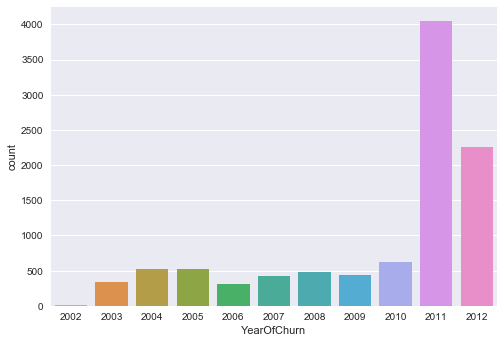

In [10]:
df2["YearOfChurn"]=df2.CHURN_DATE.dt.year
sns.countplot(df2.YearOfChurn)

Max no's of Cutsmore got churn in 2011 and 2012, could be the reason early 20's count is less or competation /technologies got invovate in 2011 oe 2012, lets check this more details

- Let's club the data source and creating goldan source for that.

In [11]:
df3=df2
##df3.drop(["CHURN_DATE","YearOfChurn"], axis=1, inplace=True)

In [12]:
df3=df3.append(df1)

In [13]:
print "Total Customer :", df3.shape
print "\n"
df3.info()

Total Customer : (19999, 31)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 0 to 9998
Data columns (total 31 columns):
ACCOUNT_STATUS               19998 non-null object
ADDRESS                      19936 non-null object
AGE                          19990 non-null object
CHURN_DATE                   10000 non-null datetime64[ns]
CITY                         19998 non-null object
COMPANY_SOURCE_NAME          19980 non-null object
COMPUTER_OWNER               13701 non-null object
DATE_OF_BIRTH                19990 non-null object
DIRECT_INDIRECT_CHANNEL      19170 non-null object
EMAIL_ADDRESS                19959 non-null object
FEEDBACK                     16057 non-null object
FIRST_COMMUNICATION_DATE     19989 non-null datetime64[ns]
FIRST_NAME                   19972 non-null object
GENDER                       17490 non-null float64
INCOME                       19681 non-null object
LAST_NAME                    19991 non-null object
MARITAL_STATUS              

In [14]:
df3.groupby("ACCOUNT_STATUS")["SITE_ACCOUNT_NUMBER"].count()

ACCOUNT_STATUS
Active       9985
Closed      10000
Inactive       13
Name: SITE_ACCOUNT_NUMBER, dtype: int64

###### 1.2 Classification based on Customer Company source Name

In [15]:
df3.groupby("COMPANY_SOURCE_NAME")["SITE_ACCOUNT_NUMBER"].count()

COMPANY_SOURCE_NAME
HNS Customers    19980
Name: SITE_ACCOUNT_NUMBER, dtype: int64

Seems COMPANY_SOURCE_NAME is not the reletive field, So can be ignored.

###### 1.3 Classification Based on Gender

In [16]:
df3.groupby("GENDER")["SITE_ACCOUNT_NUMBER"].count()

GENDER
1.0    9746
2.0    7743
Name: SITE_ACCOUNT_NUMBER, dtype: int64

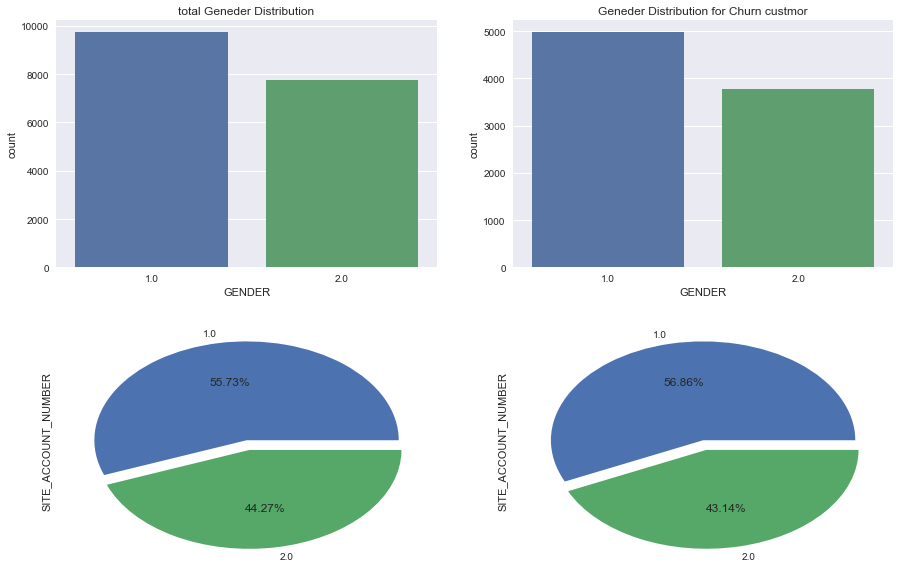

In [17]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(df3.GENDER, ax=ax[0][0])
ax[0][0].set_title("total Geneder Distribution")
sns.countplot(df2.GENDER, ax=ax[0][1])
ax[0][1].set_title("Geneder Distribution for Churn custmor")
df3.groupby("GENDER")["SITE_ACCOUNT_NUMBER"].count().plot.pie(explode=[0,.1], autopct='%0.2f%%', ax=ax[1][0])
df2.groupby("GENDER")["SITE_ACCOUNT_NUMBER"].count().plot.pie(explode=[0,.1], autopct='%0.2f%%', ax=ax[1][1])


56% male are churn as compzared to 43% of Female, So Male are more Churn as compared to Female

###### 1.4 : Year of chrn v/s First communication

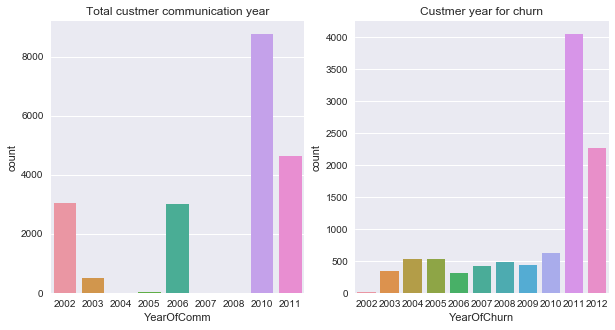

In [18]:
df3["YearOfComm"]=df2.FIRST_COMMUNICATION_DATE.dt.year
df2["YearOfChurn"]=df2.CHURN_DATE.dt.year
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(df3.YearOfComm, ax=ax[0])
ax[0].set_title("Total custmer communication year")
sns.countplot(df2.YearOfChurn, ax=ax[1])
ax[1].set_title("Custmer year for churn")


Lets Check either custmore got churn due to upgrade or something else 

In [19]:
df3.drop("YearOfComm", axis=1)
print "Total nos of churn custmore not been upgraded ",df2.UPGRADE_DATE.isnull().sum(), "out of ",df2.shape[0]
print "Total nos of Overall custmore not been upgraded ",df3.UPGRADE_DATE.isnull().sum(), "out of ",df3.shape[0]

Total nos of churn custmore not been upgraded  879 out of  10000
Total nos of Overall custmore not been upgraded  889 out of  19999


###### 1.5 Churn V/s Upgrade

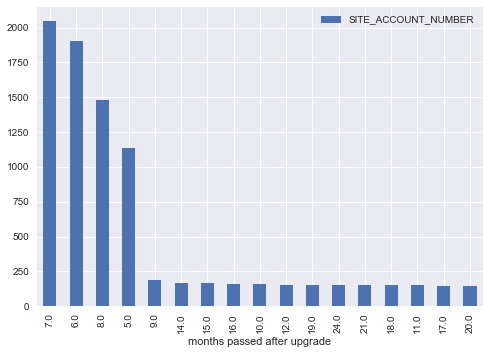

In [20]:
df2["months passed after upgrade"]=(df2.CHURN_DATE.dt.year-df2.UPGRADE_DATE.dt.year)*12+(df2.CHURN_DATE.dt.month-df2.UPGRADE_DATE.dt.month)
month_pass=df2.groupby(["months passed after upgrade"])["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)[:20].to_frame()
month_pass.plot.bar()

Most of customer got churn post 7-9 month of upgradation, So could be important factor to churn.

In [21]:
df2["IsUpgraded"]=(~df2.UPGRADE_DATE.isnull()).astype(int)
#df3["IsUpgraded"]=(~df3.UPGRADE_DATE.isnull()).astype(int)

###### 1.6 Age classification

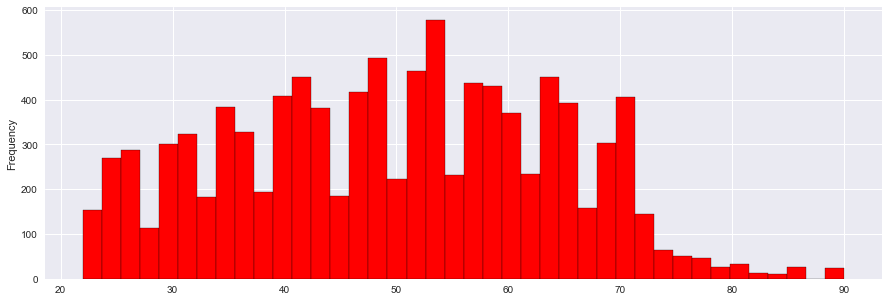

In [22]:
plt.figure(figsize=(15,5))
df2.AGE.plot.hist(bins=40,edgecolor='black',color='r')


In [23]:
print "Min churn custmore age", df2.AGE.min()
print "Max churn custmore age", df2.AGE.max()
print "Average churn custmore age", df2.AGE.mean()
print "Missing Age for Churn", df2.AGE.isnull().sum(), "Out of ", df2.AGE.shape[0], "Customer"
print "Missing Age for rest set of data", df3.AGE.isnull().sum(), "Out of ", df3.AGE.shape[0], "Customer"

Min churn custmore age 22.0
Max churn custmore age 90.0
Average churn custmore age 49.5565452362
Missing Age for Churn 8 Out of  10000 Customer
Missing Age for rest set of data 9 Out of  19999 Customer


In [24]:
df2[df2.AGE.isnull()]["DATE_OF_BIRTH"]

466     NaN
2425    NaN
2839    NaN
2960    NaN
7584    NaN
7625    NaN
9210    NaN
9634    NaN
Name: DATE_OF_BIRTH, dtype: object

>- Customer with Age 50-55, more prone to churn
>- Missing Custmer dont have date of birth also volume is very less, dont take much into concideration, Replacing Age with mean
>- Converting the Age into bins of 5

In [25]:
df2.loc[(df2.AGE.isnull()),"AGE"]=round(df2.AGE.mean(),0)

In [26]:
df1.loc[(df1.AGE=="."),"AGE"]=np.nan
df3.loc[(df3.AGE=="."),"AGE"]=np.nan

In [27]:
df3.loc[(df3.AGE.isnull()),"AGE"]=round(df3.AGE.mean(),0)
df3.AGE=df3.AGE.fillna(round(df3.AGE.mean(),0))

In [28]:
df3.groupby("AGE")["SITE_ACCOUNT_NUMBER"].count().head()

AGE
22.0    274
23.0    376
24.0    341
25.0    353
26.0    375
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [29]:
df2.loc[(df2.AGE < 40),"AGE_GRP"]=1
df2.loc[(df2.AGE >= 40)&(df2.AGE < 50),"AGE_GRP"]=2
df2.loc[(df2.AGE >= 50)&(df2.AGE < 55),"AGE_GRP"]=3
df2.loc[(df2.AGE >= 55)&(df2.AGE < 65),"AGE_GRP"]=4
df2.loc[(df2.AGE >= 65),"AGE_GRP"]=5
df2.groupby("AGE_GRP")["SITE_ACCOUNT_NUMBER"].count()

AGE_GRP
1.0    2735
2.0    2137
3.0    1272
4.0    2155
5.0    1701
Name: SITE_ACCOUNT_NUMBER, dtype: int64

We bins customer age into five part, based on their churn volume.-
- Age Group : 3 is more towords the churn
- Age Group : 2&4, following majority of churn Age
- Age Group : 1&5, less response towords churn

so seems we need to take care extra attention towords the Age group 3,2,4
and Age Group 1&5 can be easly handled.

^^^ This is initial assumption


###### 1.7 Marital Status v/s Childern

In [30]:
df2.groupby("MARITAL_STATUS")["SITE_ACCOUNT_NUMBER"].count()

MARITAL_STATUS
0    3053
1    2841
2     484
.    3341
Name: SITE_ACCOUNT_NUMBER, dtype: int64

marking Presence of childern = none, by default, As no identitor reflecting which drive the Presence of childern, and majorty of churn customer is having no childern.

In [31]:
df2.loc[df2.PRESENCE_OF_CHILDREN.isnull(),"PRESENCE_OF_CHILDREN"]=0
df3.loc[df3.PRESENCE_OF_CHILDREN.isnull(),"PRESENCE_OF_CHILDREN"]=0
df2.groupby("PRESENCE_OF_CHILDREN")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)

PRESENCE_OF_CHILDREN
0.0    6672
1.0    3328
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [32]:
df2_bkp=df2
pd.crosstab(df2.MARITAL_STATUS,df2.PRESENCE_OF_CHILDREN)

PRESENCE_OF_CHILDREN,0.0,1.0
MARITAL_STATUS,,
0,3053,0
1,1406,1435
2,242,242
.,1832,1509


Marking Marital status as Married, if having the childern, and rest unmarried if no childern. (default case)

In [33]:
df2.loc[((df2.PRESENCE_OF_CHILDREN==0)&(df2.MARITAL_STATUS==".")),"MARITAL_STATUS"]=0
df2.loc[((df2.PRESENCE_OF_CHILDREN==1)&(df2.MARITAL_STATUS==".")),"MARITAL_STATUS"]=1


In [34]:
pd.crosstab(df2.MARITAL_STATUS,df2.PRESENCE_OF_CHILDREN)

PRESENCE_OF_CHILDREN,0.0,1.0
MARITAL_STATUS,,
0,4885,0
1,1406,2944
2,242,242


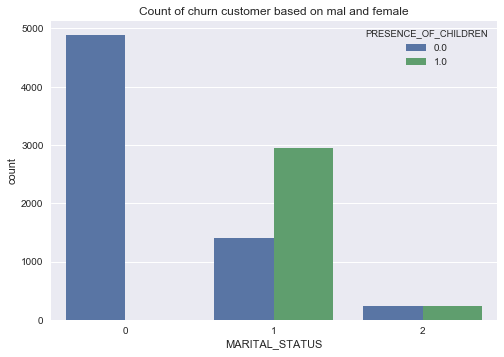

In [35]:
sns.countplot(df2.MARITAL_STATUS, hue=df2.PRESENCE_OF_CHILDREN)
plt.title("Count of churn customer based on mal and female")

###### 1.8 Classification wrt Satilite and upgrade

In [36]:
df2.groupby("SATELLITE")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)

SATELLITE
SPACEWAY3      2458
G3C-VER-24K     977
SM6-HOR-10K     807
HZN-HOR-8K      601
G16-VER-15K     521
SM5-VER-7K      518
G28-HOR-16K     517
AM6-HOR-21K     504
G26-HOR-14K     475
G28-HOR-10K     428
HZN-VER-23K     427
AMC-VER-5K      418
AM9-HOR-17K     336
Name: SITE_ACCOUNT_NUMBER, dtype: int64

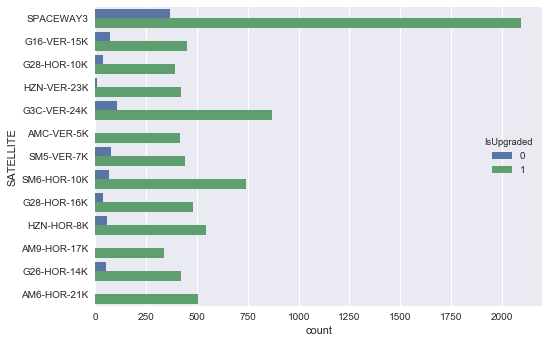

In [37]:
sns.countplot(y=df2.SATELLITE, hue=df2.IsUpgraded)

The One which got upgraded into "SPACEWAY3" more prone to Churn.

In [38]:
df2.groupby("SITE_TYPE_DESC")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)


SITE_TYPE_DESC
Spaceway            6113
Broadband Remote    3824
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [39]:
pd.crosstab(df2.SATELLITE,[df2.SITE_TYPE_DESC, df2.IsUpgraded], margins=True).T.style.background_gradient(cmap='summer_r')

Seems to be much technical, But from the observation it seems that the one upgraded in both (BroanBand and SapceWay) more towords the churn.

###### 1.9 Classification WRT Computer owner or not

In [40]:
df2.groupby("COMPUTER_OWNER")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)

COMPUTER_OWNER
Y    3932
N    2825
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [41]:
print "No of responses as COMPUTER_OWNER in churn", df2.COMPUTER_OWNER.isnull().sum()
print "No of responses as COMPUTER_OWNER in Overall", df3.COMPUTER_OWNER.isnull().sum()

No of responses as COMPUTER_OWNER in churn 3243
No of responses as COMPUTER_OWNER in Overall 6298


Marking Default as "N", as no Computer owners

In [42]:
df2.loc[df2.COMPUTER_OWNER.isnull(),"COMPUTER_OWNER"]="N"
df2.groupby("COMPUTER_OWNER")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)

COMPUTER_OWNER
N    6068
Y    3932
Name: SITE_ACCOUNT_NUMBER, dtype: int64

^^^ This could distract our result, as based on data majority of churn custmore having computer, So its better either we skip this feature or will look into this later stage.

###### 1.10 No's of Year elapsed with the network

In [43]:
df2["Year_Elapsed"]=(df2.CHURN_DATE.dt.year-df2.FIRST_COMMUNICATION_DATE.dt.year)

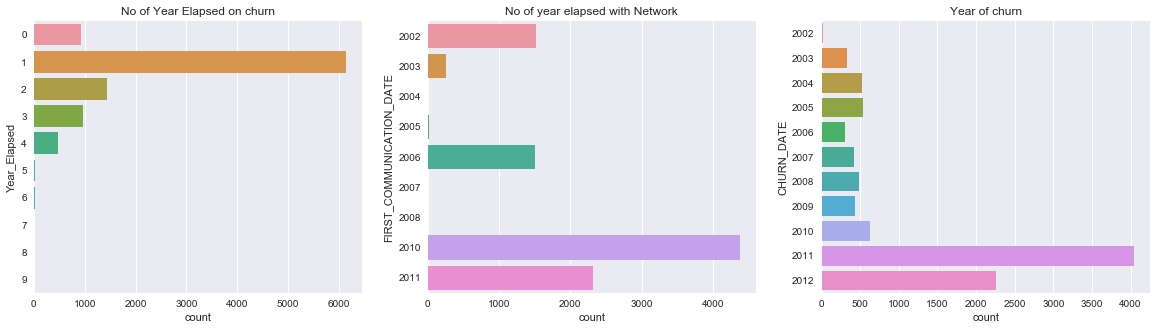

In [44]:
f,ax=plt.subplots(1,3,figsize=(20,5))
sns.countplot(y=df2.Year_Elapsed, ax=ax[0])
ax[0].set_title("No of Year Elapsed on churn")
sns.countplot(y=df2.FIRST_COMMUNICATION_DATE.dt.year, ax=ax[1])
ax[1].set_title("No of year elapsed with Network")
sns.countplot(y=df2.CHURN_DATE.dt.year, ax=ax[2])
ax[2].set_title("Year of churn")

most of Customer left was associated with network with 1-2 year, mostly customer recived in last 1-2 year.-
- Mostly last 1 year customer left , might be evolution of technologies or increase competation or most of custmore borded on last 1 year. So year of entry could be the important feature 

###### 1.11 Service Plan

In [45]:
df2.groupby("SERVICE_PLAN")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)

SERVICE_PLAN
Elite                1795
SO                   1184
Home                 1122
Professional          780
Basic_Ltd             666
Proplus               664
Power15               624
Basic                 623
Pro                   555
Professional Plus     505
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [46]:
print "Total missing churn Service plan" , df2.SERVICE_PLAN.isnull().sum()
print "Total missing overall Service plan" , df3.SERVICE_PLAN.isnull().sum()

Total missing churn Service plan 1482
Total missing overall Service plan 2721


Elite, SO and home customer are more prone to churn. Could be the important feature.
but having more missing values so ignoring these.

###### 11.1.1 Model Used

In [47]:
df2.groupby("MODEL")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)

MODEL
HN9000     2850
HN7000S    1899
DW4000     1618
DW7000     1500
DW6000     1380
UNK          43
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [48]:
pd.crosstab(df2.MODEL,df2.IsUpgraded,margins=True).style.background_gradient(cmap='summer_r')

Customer wirh model : HN9000 arem ore churn as compared to with model as UNK.

###### 1.12 Sales Chanel

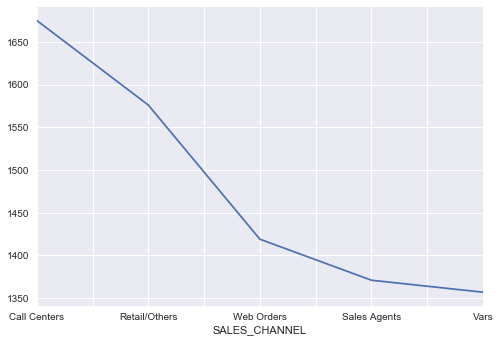

In [49]:
df2.groupby("SALES_CHANNEL")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False).plot()

In [50]:
df2.groupby("DIRECT_INDIRECT_CHANNEL")["SITE_ACCOUNT_NUMBER"].count()

DIRECT_INDIRECT_CHANNEL
Direct      2805
Indirect    6411
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [51]:
pd.crosstab(df2.SALES_CHANNEL, df2.DIRECT_INDIRECT_CHANNEL)

DIRECT_INDIRECT_CHANNEL,Direct,Indirect
SALES_CHANNEL,,
Call Centers,476,1185
Retail/Others,446,1126
Sales Agents,384,977
Vars,402,944
Web Orders,393,1018


In [52]:
pd.crosstab([df2.SALES_CHANNEL, df2.DIRECT_INDIRECT_CHANNEL],df2.SATELLITE).style.background_gradient(cmap='summer_r')

Nothing to say much about this, But we had more indirect customer as compared to direct to be churn.
Could be the reason we had more customer registred with indirect Chanel.-
- As more customer registred with Indirect chanel, So we are setting defacult as In-direct


In [53]:
df3.DIRECT_INDIRECT_CHANNEL.isnull().sum()


829

In [54]:
df3.DIRECT_INDIRECT_CHANNEL=df3.DIRECT_INDIRECT_CHANNEL.fillna("Indirect")

df3.loc[(df3.DIRECT_INDIRECT_CHANNEL==0),"DIRECT_INDIRECT_CHANNEL"]="Indirect"



In [55]:
df3.DIRECT_INDIRECT_CHANNEL.isnull().sum()

0

Their was 829 missing for Chanel, which filled with "In-direct Chanel"

###### 1.13 Feed Back analysis

This could be the intresting part, either customer got churn due to their feedback or something else, Though its not mentoned in details which feed back its refferes to, lets try to figure it out.

In [56]:
print "Total Mising Feedback : ", df2.FEEDBACK.isnull().sum(), "out of ", df2.shape[0], "Sample"

Total Mising Feedback :  2028 out of  10000 Sample


In [57]:
df2.groupby("FEEDBACK")["SITE_ACCOUNT_NUMBER"].count()

FEEDBACK
BAD     5053
GOOD    2919
Name: SITE_ACCOUNT_NUMBER, dtype: int64

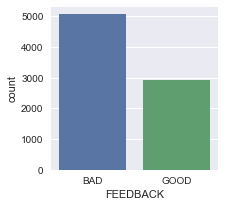

In [58]:
plt.figure(figsize=(3,3))
sns.countplot(df2.FEEDBACK)

In [59]:
pd.crosstab(df2.AGE_GRP, df2.FEEDBACK)

FEEDBACK,BAD,GOOD
AGE_GRP,,
1.0,1381,787
2.0,1071,630
3.0,653,375
4.0,1088,623
5.0,860,504


In [60]:
pd.crosstab([df2.AGE_GRP, df2.FEEDBACK],df2.IsUpgraded)

IsUpgraded          0     1
AGE_GRP FEEDBACK           
1.0     BAD       117  1264
        GOOD       79   708
2.0     BAD        86   985
        GOOD       63   567
3.0     BAD        58   595
        GOOD       33   342
4.0     BAD        92   996
        GOOD       58   565
5.0     BAD        65   795
        GOOD       41   463

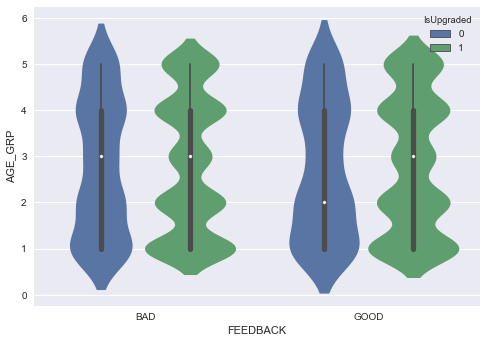

In [61]:
sns.violinplot(y=df2.AGE_GRP, x=df2.FEEDBACK, hue=df2.IsUpgraded)

>- 20% missing Feedback, either they havnt contacted. as they left 
>- Bad customer having double then having good exprienced.
>- Few non-Upgraded and more upgraded  having bad exprience, becoe churn.

###### 1.14 Income

Last but not least, major factor to impact the custmoer behaviour. Yes thats correct Money, lets check how its works.

In [62]:
type(df2.INCOME[0])

int

In [63]:
df2.loc[(df2.INCOME=='A'),"INCOME" ]=11
df2.loc[(df2.INCOME=='B'),"INCOME" ]=12
df2.loc[(df2.INCOME=='C'),"INCOME" ]=13
df2.loc[(df2.INCOME=='D'),"INCOME" ]=14

In [64]:
df2.groupby(df2.INCOME)["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False).to_frame()

,SITE_ACCOUNT_NUMBER
INCOME,
0,2326
3,1440
5,1175
4,1171
6,1103
11,551
7,421
2,383
8,379


In [65]:
pd.crosstab(df2.AGE_GRP,df2.INCOME,margins=True).T.style.background_gradient(cmap='summer_r')

>- Income with <10k, having more towords the churn (~20%). having 25% of age band <40Y
>- Income with 30-40K, are second most churns having age <40% are widly distributed.

>- Age band 3, i.e more churnes age, having average income B/w 30-40K.
>- Income of all custmoers are available.

^^^ Dosn't get details insight as of now.

###### 1.15 States

In [66]:
df2.groupby("STATE")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False)[:15]

STATE
 CA    1298
 TX    1015
 CO     566
 NY     529
 VA     528
 MD     483
 IL     373
 MO     330
 MI     327
 AR     312
 OR     298
 AZ     249
 MS     234
 WA     219
 NC     219
Name: SITE_ACCOUNT_NUMBER, dtype: int64

In [67]:
States_1=df2.groupby("STATE")["STATE"].count().sort_values(ascending=False)[:15].to_frame()
States_1

,STATE
STATE,
CA,1298
TX,1015
CO,566
NY,529
VA,528
MD,483
IL,373
MO,330
MI,327


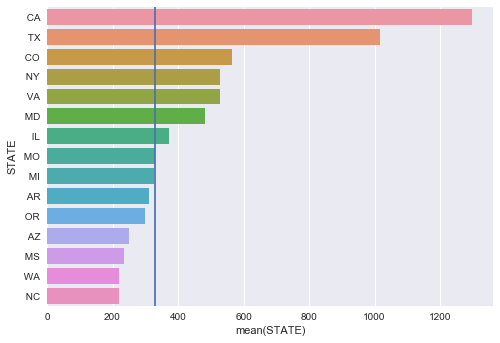

In [68]:
sns.barplot(States_1.STATE,States_1.index)
plt.axvline(States_1.STATE.median())

States CA has more nos of customer to be churn followed by TX (Second highest)and CO.

###### 1.16 SALES_SOURCE

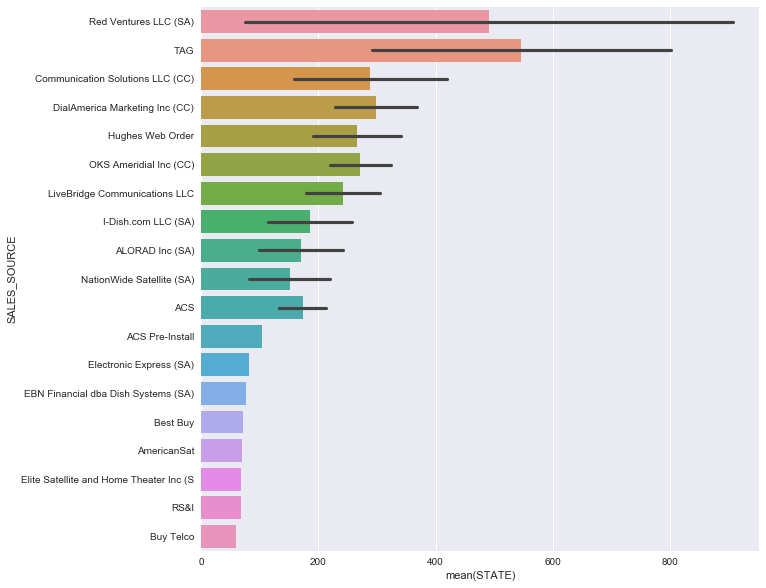

In [69]:
plt.figure(figsize=(10,10))
Sales=df2.groupby(["SALES_SOURCE","DIRECT_INDIRECT_CHANNEL"])["STATE"].count().sort_values(ascending=False)[:30].to_frame().reset_index()
sns.barplot("STATE","SALES_SOURCE",data=Sales)


- Red Ventures LLC (SA) having max indirect Sales chanel, followed by "TAG"
- Communication Solutions LLC (CC) having max Direct Sales Chanel.

###### 1.17 : WARRANTY_NAME

In [70]:
df2.groupby("WARRANTY_NAME")["SITE_ACCOUNT_NUMBER"].count().sort_values(ascending=False).to_frame()

,SITE_ACCOUNT_NUMBER
WARRANTY_NAME,
0,6116
EXPRESS REPAIR BASIC,2472
EXPRESS REPAIR HOME WITH TERM,303
SRVC ASSUR STD NEW CUST,298
Broadband Remote,39
SRVC ASSUR PLUS NEW CUST,28
EXPRESS REPAIR BUSINESS WITH TERM,23
Spaceway,16
EXPRESS REPAIR HOME,14


In [71]:
pd.crosstab(df2.WARRANTY_NAME,df2.SERVICE_PLAN,margins=True).style.background_gradient(cmap="summer_r")

Customer having the Basic/ Home with term Warrany taken, are mroe towords churn. Seems they havnt spend much amount on buying corrosponding waranty.
- As missing values are more than 50%, consider either they havnt taken any waranty.
- Binning this into four such that 
    - General - 0
    - EXPRESS REPAIR BASIC - 1
    - EXPRESS REPAIR HOME WITH TERM - 2
    - Rest - 3

In [72]:
df2.WARRANTY_NAME=df2.WARRANTY_NAME.fillna(1)

In [73]:
df2.loc[(df2.WARRANTY_NAME=="EXPRESS REPAIR BASIC "),"WARRANTY_No"]=2
df2.loc[(df2.WARRANTY_NAME=="EXPRESS REPAIR HOME WITH TERM"),"WARRANTY_No"]=3
df2.WARRANTY_No=df2.WARRANTY_No.fillna(4)

In [74]:
pd.crosstab(df2.WARRANTY_No,df2.SERVICE_PLAN,margins=True).style.background_gradient(cmap="summer_r")

In [75]:
df2.loc[(df2.WARRANTY_NAME==0),"WARRANTY"]=0
df2.loc[(df2.WARRANTY_NAME=="EXPRESS REPAIR BASIC"),"WARRANTY"]=1
df2.loc[(df2.WARRANTY_NAME=="EXPRESS REPAIR HOME WITH TERM"),"WARRANTY"]=2
df2.WARRANTY=df2.WARRANTY.fillna(3)


In [76]:
df2.WARRANTY=df2.WARRANTY.astype(int)
pd.crosstab(df2.WARRANTY,df2.SERVICE_PLAN,margins=True).style.background_gradient(cmap="summer_r")

### Observation

>- Customer having $Age between 40-60 $ more towords churn.
>- Most of customer $ registred in 2010-2011 $ and density of churn chustomer in max during $2011-2012 - Churn period$.
>- $Male$ are more churn as compared to Female.
>- $Bachelor$ are more churn as compared to married or seprated, $followed by married with kid $.
>- $States CA$ reported more churn followed by TX.
>- $Income  Less than 10K USD$ , are more churn followed by income b/w $30-40 USD.
>- Feedback $"Bad"$ also drive custmore as Churn.
>- Plan as Elite, having max churn (~20%)
>- Technology upgrade could also be the reason of upgrade, either customer dosnt like that. As more the customer having technologies upgraded, send the feedback as BAD.
>- Most of customer are In-direct customer become churn.
>- Custmoer having No waranty having more than 60% churn rate, followed by custmoer havingbasic waranty having count more than  24%

### 2 : data Explorate analysis

###### 2.1 Varible Classification

In [77]:
df4=df2
df2["AGE_GRP1"]=0

In [78]:
def Age_classification(df3):
    df3.loc[(df3.AGE < 40),"AGE_GRP"]=1
    df3.loc[(df3.AGE >= 40)&(df3.AGE < 50),"AGE_GRP"]=2
    df3.loc[(df3.AGE >= 50)&(df3.AGE < 55),"AGE_GRP"]=3
    df3.loc[(df3.AGE >= 55)&(df3.AGE < 65),"AGE_GRP"]=4
    df3.loc[(df3.AGE >= 65),"AGE_GRP"]=5
    
    return df3

In [79]:
#df5=df3.copy() ## Taking the bavkup.

In [80]:
#df3=df5.copy()

>- ACCOUNT_STATUS, is active, inactive, Closed. Densitiy of inactive is very less, So conciderating those inactive obseration as Active. Generating a new column IsChurn (0 -Active /1 -Closed). and droping the orginal column.


>- FIRST_COMMUNICATION_DATE, As frequency of customer is increased in 2010+, so binning this as
    - less than 2010 -> 1, 
    - 2010 -> 2, 
    - 2011 -> 3,
    - 2012 -> 4,
    - and droping the  orginal columns.

>- UPGRADE_DATE : Driving a new column, How old (post upgrade in year) the customer is. but we dont have the churn date, As max churn date is 2011, So conciderating todays date as year 2011, and deleting orginal columns.

>- COMPANY_SOURCE_NAME : all observation having same values so ignoring that.

>- FIRST_NAME / LAST_NAME/ ADDRESS	/ CITY/ZIPCODE/EMAIL_ADDRESS : Is useful field, but all the columns havign distinct values so ignoring that.

>- SATELLITE - Will create Dummis of that.
>- SITE_TYPE_DESC - Will create dummy of that.

>- GENDER : Males are more churn then female, So could be the relevent field.
>- DATE_OF_BIRTH and Age : created new columns as "Age Group" having 5 bins.  
    - 1 : Less than 40
    - 2 : Less than 50 
    - 3 : Less than 55
    - 4 : less than 60
    - 5 : Grater than 60
    - So will drop both the columns.
    
 >- WARRANTY_NAME : As missing values are more than 50%, consider either they havnt taken any waranty.
        -•Binning this into four such that 
        -◾General - 0
        -◾EXPRESS REPAIR BASIC - 1
        -◾EXPRESS REPAIR HOME WITH TERM - 2
        -◾Rest - 3


    
>- INCOME : No changes, As continious varible Could be relevent field.
>- MARITAL_STATUS and Chield : already handled the missing, in pre-preperation task.
>- COMPUTER_OWNER : more than 50% missing, so ignoring them


###### will check later.

>- SERVICE_PLAN 
>-  MODEL 
>- SALES_CHANNEL 
>- MOST_RECENT_SALES_CHANNEL 

>- STATE 
>- FEEDBACK 


>- SALES_SOURCE : ignoring that.



>- DIRECT_INDIRECT_CHANNEL : Direct/InDirect client : will check later



###### Deriving Age

In [81]:
###df3.loc[(df3.AGE < 40),"AGE_GRP"]=1
###df3.loc[(df3.AGE >= 40)&(df3.AGE < 50),"AGE_GRP"]=2
###df3.loc[(df3.AGE >= 50)&(df3.AGE < 55),"AGE_GRP"]=3
###df3.loc[(df3.AGE >= 55)&(df3.AGE < 65),"AGE_GRP"]=4
###df3.loc[(df3.AGE >= 65),"AGE_GRP"]=5

df3=Age_classification(df3)

###### Deriving Account Status 
Active - 0
Closed - 1

In [82]:
df3.loc[(df3.ACCOUNT_STATUS=="Closed"),"STATUS_ACCOUNT"]=1
df3.STATUS_ACCOUNT=df3.STATUS_ACCOUNT.fillna(0)
df3.STATUS_ACCOUNT=df3.STATUS_ACCOUNT.astype(int)


In [83]:
df3.groupby("STATUS_ACCOUNT")["AGE_GRP"].count()

STATUS_ACCOUNT
0     9999
1    10000
Name: AGE_GRP, dtype: int64

###### Fixing w.r.t. First communication Date.
As max churn date is "2012-07-25 ", so calculating max nos of years customer is with network based on $churn_date-first_communication_date$.

In [84]:
print "First Communication date" , df3.FIRST_COMMUNICATION_DATE.min(), "and  max communication Date", df3.FIRST_COMMUNICATION_DATE.max()
print "Customer having date less than Year 2000", df3[df3.FIRST_COMMUNICATION_DATE.dt.year < 2000]["FIRST_COMMUNICATION_DATE"].count()

print "Actual Customer min date", df3[df3.FIRST_COMMUNICATION_DATE.dt.year >= 2000].FIRST_COMMUNICATION_DATE.min()
print "Total missing First Communication Date ", df3.FIRST_COMMUNICATION_DATE.isnull().sum()


First Communication date 1900-01-01 00:00:00 and  max communication Date 2011-03-16 00:00:00
Customer having date less than Year 2000 58
Actual Customer min date 2000-11-07 00:00:00
Total missing First Communication Date  10


Seems 01/01/1900 is the DB defaul date, so are equalent to null values, We are having 2000 customer having this null date, replacing these with first communication date i.e "2000-11-07 "

In [85]:
df3.loc[(df3.FIRST_COMMUNICATION_DATE.dt.year<2000),"FIRST_COMMUNICATION_DATE"]=pd.to_datetime(pd.Series(['07/11/2000']), format="%m/%d/%Y")
#df3.FIRST_COMMUNICATION_DATE=df3.FIRST_COMMUNICATION_DATE.fillna(pd.to_datetime(pd.Series(['07/11/2000']), format="%m/%d/%Y"))

In [86]:

print "Total missing First Communication Date ", df3.FIRST_COMMUNICATION_DATE.isnull().sum()

Total missing First Communication Date  68


In [87]:
Max_Churn_Date=pd.to_datetime(pd.Series(['07/25/2012']), format="%m/%d/%Y")
Max_Churn_Date

0   2012-07-25
dtype: datetime64[ns]

In [88]:
df3["Services_Year"]=2012-df3.FIRST_COMMUNICATION_DATE.dt.year

In [89]:
print "No of missing first communication date Customer have been upgraded", df3.loc[(df3.Services_Year.isnull())&
                                                                                (df3.UPGRADE_DATE.dt.year>2000)&
                                                                                (~df3.UPGRADE_DATE.isnull())]["FIRST_COMMUNICATION_DATE"]

No of missing first communication date Customer have been upgraded Series([], Name: FIRST_COMMUNICATION_DATE, dtype: datetime64[ns])


As missing First communication ddate also not been updated so replacing corrospondign no of year with services with mean and dropping orginal columns.

In [90]:
df3.Services_Year=df3.Services_Year.fillna(df3.Services_Year.mean())

In [91]:
print "Total missing year of Services ",df3.Services_Year.isnull().sum()

Total missing year of Services  0


###### Fixing w.r.t. Upgradation Date

In [92]:
print "First Upgradation date" , df3.UPGRADE_DATE.min(), "and  max UPGRADE_DATE", df3.UPGRADE_DATE.max()
print "Customer having date less than Year 2000 -:", df3[df3.UPGRADE_DATE.dt.year < 2000]["UPGRADE_DATE"].count()

print "Actual UPGRADE_DATE min date", df3[df3.UPGRADE_DATE.dt.year >= 2000].UPGRADE_DATE.min()
print "Total missing UPGRADE_DATE ", df3.UPGRADE_DATE.isnull().sum()

First Upgradation date 1901-05-25 00:00:00 and  max UPGRADE_DATE 2014-02-10 00:00:00
Customer having date less than Year 2000 -: 58
Actual UPGRADE_DATE min date 2002-06-08 00:00:00
Total missing UPGRADE_DATE  889


In [93]:
df3.loc[(df3.UPGRADE_DATE.dt.year<2000),"UPGRADE_DATE"]=pd.to_datetime(pd.Series(['08/06/2002']), format="%m/%d/%Y")

In [94]:
df3["IsUpgraded"]=(~df3.UPGRADE_DATE.isnull()).astype(int)

###### Warranty Classification

In [95]:
df3.loc[(df3.WARRANTY_NAME==0),"WARRANTY"]=0
df3.loc[(df3.WARRANTY_NAME=="EXPRESS REPAIR BASIC"),"WARRANTY"]=1
df3.loc[(df3.WARRANTY_NAME=="EXPRESS REPAIR HOME WITH TERM"),"WARRANTY"]=2
df3.WARRANTY=df3.WARRANTY.fillna(3)

###### fixing Income

In [96]:
df3.loc[(df3.INCOME=='A'),"INCOME" ]=11
df3.loc[(df3.INCOME=='B'),"INCOME" ]=12
df3.loc[(df3.INCOME=='C'),"INCOME" ]=13
df3.loc[(df3.INCOME=='D'),"INCOME" ]=14

###### Fixing Nos of childern

In [97]:
df3.loc[((df3.PRESENCE_OF_CHILDREN==0)&(df3.MARITAL_STATUS==".")),"MARITAL_STATUS"]=0
df3.loc[((df3.PRESENCE_OF_CHILDREN==1)&(df3.MARITAL_STATUS==".")),"MARITAL_STATUS"]=1

###### Computer owner (Y/N)

In [98]:
###df3["Having_Computer"]=df3.COMPUTER_OWNER.apply(lambda x: 1 if x=="Y" else 0)

In [99]:
df3.loc[(df3.COMPUTER_OWNER=="Y"),"Having_Computer"]=1
df3.loc[(df3.COMPUTER_OWNER=="N"),"Having_Computer"]=0

In [100]:
## New Columns Age Group drived on that basis
df3.drop("AGE",axis=1, inplace = True)  
df3.drop("DATE_OF_BIRTH",axis=1, inplace = True)
## All varible having same values.
#######df3.drop("COMPANY_SOURCE_NAME",axis=1, inplace = True)
## Customer info 
df3.drop("FIRST_NAME",axis=1, inplace = True)
df3.drop("LAST_NAME",axis=1, inplace = True)
df3.drop("ADDRESS",axis=1, inplace = True)
df3.drop("CITY",axis=1, inplace = True)
df3.drop("ZIPCODE",axis=1, inplace = True)
df3.drop("EMAIL_ADDRESS",axis=1, inplace = True)
## Account status as new columns Status  derived.
df3.drop("ACCOUNT_STATUS",axis=1, inplace = True)
## First communication date and Upgradation Date
df3.drop("FIRST_COMMUNICATION_DATE",axis=1, inplace = True)
df3.drop("UPGRADE_DATE",axis=1, inplace = True)
### SALES_SOURCE as multiple distinct values
df3.drop("SALES_SOURCE",axis=1, inplace = True)
### Warranty as created another columns with that.
df3.drop("WARRANTY_NAME",axis=1, inplace = True)
### Churn Date
df3.drop("CHURN_DATE",axis=1, inplace = True)
###

df3.drop("COMPUTER_OWNER",axis=1, inplace = True)

##
df3.drop("YearOfChurn",axis=1, inplace = True)
df3.drop("YearOfComm",axis=1, inplace = True)
## nothing can be drive with this.
df3.drop("SITE_ACCOUNT_NUMBER",axis=1, inplace = True)
df3.drop("COMPANY_SOURCE_NAME",axis=1, inplace = True)

In [101]:
### Converting the  object/Float categorical columns into int
df3.PRESENCE_OF_CHILDREN=df3.PRESENCE_OF_CHILDREN.astype(int)
df3.AGE_GRP=df3.AGE_GRP.astype(int)
df3.STATUS_ACCOUNT=df3.STATUS_ACCOUNT.astype(int)
df3.Services_Year=df3.Services_Year.astype(int)
df3.IsUpgraded=df3.IsUpgraded.astype(int)
df3.WARRANTY=df3.WARRANTY.astype(int)

### 3 Feature Engineering

In [102]:
df3.select_dtypes(include=['object']).columns

Index([u'DIRECT_INDIRECT_CHANNEL', u'FEEDBACK', u'INCOME', u'MARITAL_STATUS',
       u'MODEL', u'MOST_RECENT_SALES_CHANNEL', u'SALES_CHANNEL', u'SATELLITE',
       u'SERVICE_PLAN', u'SITE_TYPE_DESC', u'STATE'],
      dtype='object')

In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 0 to 9998
Data columns (total 19 columns):
DIRECT_INDIRECT_CHANNEL      19999 non-null object
FEEDBACK                     16057 non-null object
GENDER                       17490 non-null float64
INCOME                       19681 non-null object
MARITAL_STATUS               19399 non-null object
MODEL                        18613 non-null object
MOST_RECENT_SALES_CHANNEL    19971 non-null object
PRESENCE_OF_CHILDREN         19999 non-null int32
SALES_CHANNEL                14491 non-null object
SATELLITE                    18590 non-null object
SERVICE_PLAN                 17278 non-null object
SITE_TYPE_DESC               19925 non-null object
STATE                        19932 non-null object
AGE_GRP                      19999 non-null int32
STATUS_ACCOUNT               19999 non-null int32
Services_Year                19999 non-null int32
IsUpgraded                   19999 non-null int32
WARRANTY                     

In [104]:
##"GENDER",
##l1=["INCOME","MARITAL_STATUS","PRESENCE_OF_CHILDREN","AGE_GRP","STATUS_ACCOUNT","Services_Year","IsUpgraded","WARRANTY","Having_Computer"]
##df3[l1].astype(int)

In [105]:
##### Taking the  backup of df3 for furter classification
#df6=df3.copy()

In [106]:
#df3=df6.copy()

In [107]:
df8=df3[~df3.GENDER.isnull()].copy()
df8.GENDER.isnull().sum()
df8.GENDER=df8.GENDER.astype(int)

In [108]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 19 columns):
DIRECT_INDIRECT_CHANNEL      17490 non-null object
FEEDBACK                     14032 non-null object
GENDER                       17490 non-null int32
INCOME                       17211 non-null object
MARITAL_STATUS               16964 non-null object
MODEL                        16272 non-null object
MOST_RECENT_SALES_CHANNEL    17464 non-null object
PRESENCE_OF_CHILDREN         17490 non-null int32
SALES_CHANNEL                12699 non-null object
SATELLITE                    16259 non-null object
SERVICE_PLAN                 15094 non-null object
SITE_TYPE_DESC               17425 non-null object
STATE                        17429 non-null object
AGE_GRP                      17490 non-null int32
STATUS_ACCOUNT               17490 non-null int32
Services_Year                17490 non-null int32
IsUpgraded                   17490 non-null int32
WARRANTY                     17

In [109]:
pd.crosstab(df8.Having_Computer, df8.INCOME, margins=True)

INCOME,0,1,2,3,4,5,6,7,8,9,11,12,13,14,All
Having_Computer,,,,,,,,,,,,,,,
0.0,1931,133,167,707,762,810,1106,624,388,312,271,52,102,143,7508
1.0,1095,96,155,554,495,476,549,237,205,135,187,60,74,109,4427
All,3026,229,322,1261,1257,1286,1655,861,593,447,458,112,176,252,11935


In [110]:
pd.crosstab(df8.SERVICE_PLAN, (df8.Having_Computer, df8.INCOME))

Having_Computer    0.0                                         ... 1.0      \
INCOME              0   1   2    3    4    5    6   7   8   9  ...  4   5    
SERVICE_PLAN                                                   ...           
Basic              200  11  12   76   80   82  113  73  38  49 ...  41  39   
Basic_Ltd          240  11  18   70   70   83  114  86  39  36 ...  38  40   
Elite              264  24  28  103  119  113  146  97  64  39 ...  97  79   
Home               221  17  14   73   89   97  140  86  56  38 ...  41  50   
Power15             35   5   3   18   16   19   15   3   3   2 ...  24  34   
Power150           164   8  14   42   59   65  112  49  36  35 ...  13  10   
Pro                176   9  15   57   80   86  117  67  43  28 ...  45  32   
Professional        51   4   6   21   31   30   19   9   8   4 ...  29  33   
Professional Plus   32   2   4   14   16   13   16   2   4   0 ...  26  17   
Proplus            223  16  16   73   77   75  122  75  33  31 ...  28  27   
SO                  77   6  14   45   30   33   33  14  12  11 ...  42  36   

Having_Computer                                   
INCOME             6   7   8   9   11 12  13  14  
SERVICE_PLAN                                      
Basic              45  20  17  15   9  7   5   7  
Basic_Ltd          44  16  18   3  12  4   7   7  
Elite              93  35  32  22  29  4  15  19  
Home               63  25  27  17  16  9   8  11  
Power15            27  10  11   8  18  6   4   5  
Power150           20  13  13   7   5  1   1   1  
Pro                40  18  10  13  15  4   4  11  
Professional       34  17  10   6  15  3   4   4  
Professional Plus  18   5  10   6  13  4   2   8  
Proplus            42  29  14  14  10  3   1   9  
SO                 56   9  13   7  13  8  12  11  

[11 rows x 28 columns]

In [111]:
pd.crosstab(df8.SALES_CHANNEL, (df8.Having_Computer, df8.INCOME))

Having_Computer  0.0                                          ...  1.0      \
INCOME            0   1   2    3    4    5    6    7   8   9  ...   4   5    
SALES_CHANNEL                                                 ...            
Call Center      190  15   6   47   67   67  102   77  45  39 ...   19   6   
Call Centers     112   6  19   70   43   32   27    3  12  15 ...   59  42   
Retail/Others     59  11   8   60   51   62   49   10  10  18 ...   62  73   
Retail/others    185  20  10   42   74   82  114   74  42  38 ...    9  12   
Sales Agents     256   9  21  121  133  107  175  101  64  47 ...  114  89   
Vars             241  16  18  117  102  126  159   84  59  51 ...   78  79   
Web Orders        58   9  12   49   46   59   45   17  20  10 ...   51  53   
Web orders       194   9  11   54   48   71  138   73  44  31 ...   13  11   

Having_Computer                                   
INCOME            6   7   8   9   11  12  13  14  
SALES_CHANNEL                                     
Call Center       13  16  11  11   2   1   0   4  
Call Centers      35  14  17  21  34  11  25  23  
Retail/Others     70  19  21  11  17  14   9  17  
Retail/others     28  17   7   6   5   0   3   6  
Sales Agents     103  23  42  17   9   5   3   3  
Vars              89  47  33  28  34  12   8  16  
Web Orders        53  20  19  10  19   8  12  10  
Web orders        18  15  13   8   5   0   2   0  

[8 rows x 28 columns]

In [112]:
pd.crosstab(df8.SITE_TYPE_DESC, df8.Having_Computer)

Having_Computer,0.0,1.0
SITE_TYPE_DESC,,
Broadband Remote,4930,2069
Spaceway,2564,2340


As we can see from the given data set give, most of customer dosnt own the computer. their are no relationship b/w income, Site type, Sales Chanel and owns a computer, so we marking for missing computer owners as "NO"

In [113]:
df8.Having_Computer=df8.Having_Computer.fillna(0)
df8.Having_Computer=df8.Having_Computer.astype(int)

As we observed, max customer belongs to 'CA', and having missing is low volume so marking default state as 'CA'

In [114]:
df8.STATE=df8.STATE.fillna('CA')

In [115]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 19 columns):
DIRECT_INDIRECT_CHANNEL      17490 non-null object
FEEDBACK                     14032 non-null object
GENDER                       17490 non-null int32
INCOME                       17211 non-null object
MARITAL_STATUS               16964 non-null object
MODEL                        16272 non-null object
MOST_RECENT_SALES_CHANNEL    17464 non-null object
PRESENCE_OF_CHILDREN         17490 non-null int32
SALES_CHANNEL                12699 non-null object
SATELLITE                    16259 non-null object
SERVICE_PLAN                 15094 non-null object
SITE_TYPE_DESC               17425 non-null object
STATE                        17490 non-null object
AGE_GRP                      17490 non-null int32
STATUS_ACCOUNT               17490 non-null int32
Services_Year                17490 non-null int32
IsUpgraded                   17490 non-null int32
WARRANTY                     17

In [116]:
df8.SALES_CHANNEL=df8.SALES_CHANNEL.str.capitalize()

In [117]:
df8.SALES_CHANNEL=df8.SALES_CHANNEL.str.replace(" ","_")
df8.SALES_CHANNEL=df8.SALES_CHANNEL.str.replace("Call_centers","Call_center")

In [118]:
df8.groupby(["SALES_CHANNEL"])["DIRECT_INDIRECT_CHANNEL"].count()

SALES_CHANNEL
Call_center      2675
Retail/others    2624
Sales_agents     2485
Vars             2459
Web_orders       2456
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [119]:
pd.crosstab(df8.SALES_CHANNEL, df8.DIRECT_INDIRECT_CHANNEL)

DIRECT_INDIRECT_CHANNEL,Direct,Indirect
SALES_CHANNEL,,
Call_center,696,1979
Retail/others,691,1933
Sales_agents,641,1844
Vars,628,1831
Web_orders,630,1826


In [120]:
pd.crosstab([df2.SALES_CHANNEL, df2.DIRECT_INDIRECT_CHANNEL],df2.SATELLITE).style.background_gradient(cmap='summer_r')

In [121]:
pd.crosstab([df2.SALES_CHANNEL, df2.DIRECT_INDIRECT_CHANNEL],df2.SERVICE_PLAN).style.background_gradient(cmap='summer_r')

In [122]:
pd.crosstab(df8.SALES_CHANNEL, df8.AGE_GRP).style.background_gradient(cmap='summer_r')

In [123]:
df9=df8.copy()

In [124]:
pd.crosstab(df8.SALES_CHANNEL, df8.Services_Year).style.background_gradient(cmap='summer_r')

In [125]:
    pd.crosstab(df8.SALES_CHANNEL, df8.STATE).style.background_gradient(cmap='summer_r')

Seems we have more that 50% missing and did not find any way to figure out how to fix the missing so droping this, concidering as this is necessary field during on boarding the customer, once the customer is on-board, either customer will be churn or not depends upon the behaviour and exprience with the network.

In [126]:
df9.drop("SALES_CHANNEL",axis=1, inplace=True)

In [127]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 18 columns):
DIRECT_INDIRECT_CHANNEL      17490 non-null object
FEEDBACK                     14032 non-null object
GENDER                       17490 non-null int32
INCOME                       17211 non-null object
MARITAL_STATUS               16964 non-null object
MODEL                        16272 non-null object
MOST_RECENT_SALES_CHANNEL    17464 non-null object
PRESENCE_OF_CHILDREN         17490 non-null int32
SATELLITE                    16259 non-null object
SERVICE_PLAN                 15094 non-null object
SITE_TYPE_DESC               17425 non-null object
STATE                        17490 non-null object
AGE_GRP                      17490 non-null int32
STATUS_ACCOUNT               17490 non-null int32
Services_Year                17490 non-null int32
IsUpgraded                   17490 non-null int32
WARRANTY                     17490 non-null int32
Having_Computer              174

###### fixing the Feedback

In [128]:
pd.crosstab(df8.FEEDBACK, [df8.MOST_RECENT_SALES_CHANNEL,df8.SERVICE_PLAN]).T.style.background_gradient(cmap='summer_r')

###### FeedBack Asumption based on available date
   

Mostly Feedback is BAD for customer having Resent migration class as : 
    Direct, business Edition, Dealer - Direct Order ,Distributor Sales Age   ,  Hughes Sales Agents ,Retail - Direct Order ,Used Equipment 

 
Mostly Feedback is GOOd for customer having Resent migration class as : 
    Classis migration, DCP classic migration, DW6000 Upgrade ,DW7000 Upgrade , Dealer-Generated Sale,Dial Return Upgrade,EXPRESS REPAIR BASIC ,HN7000 Upgrade ,HN9000 Upgrade ,National Sales ,Retail ,Retail ,UNKNOWN ,

and making rest as Good Feedback


In [129]:
df10=df9.copy()
df11=df9.copy()

In [130]:
df11.MOST_RECENT_SALES_CHANNEL=df11.MOST_RECENT_SALES_CHANNEL.str.capitalize()
df11.MOST_RECENT_SALES_CHANNEL=df11.MOST_RECENT_SALES_CHANNEL.str.replace(" ","_")
df11.MOST_RECENT_SALES_CHANNEL=df11.MOST_RECENT_SALES_CHANNEL.str.replace("Retail_______","Retail")

 

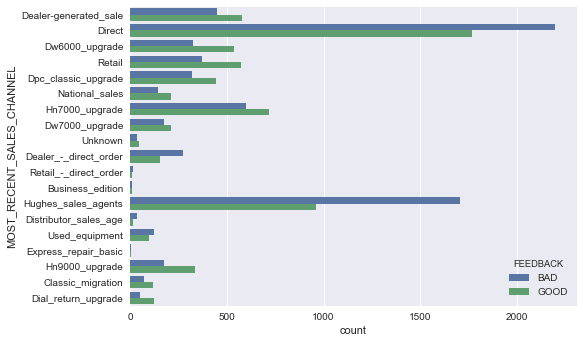

In [131]:
sns.countplot(y=df11.MOST_RECENT_SALES_CHANNEL, hue=df11.FEEDBACK)

In [132]:
#### Fixing Feed Back based on above analysis

df11.loc[(df11.MOST_RECENT_SALES_CHANNEL.isin(['Direct','Dealer_-_direct_order','Retail_-_direct_order','Hughes_sales_agents','Distributor_sales_age','Used_equipment']))&(df11.FEEDBACK.isnull()),"FEEDBACK" ]="BAD"
df11.loc[(df11.MOST_RECENT_SALES_CHANNEL.isin(['Dealer-generated_sale','Dw6000_upgrade','Retail','Dpc_classic_upgrade','National_sales','Hn7000_upgrade','Dw7000_upgrade','Unknown','Business_edition','Express_repair_basic','Hn9000_upgrade','Classic_migration','Dial_return_upgrade']))&(df11.FEEDBACK.isnull()),"FEEDBACK" ]="GOOD"
df11.FEEDBACK.isnull().sum()

18

In [133]:
df11.FEEDBACK=df11.FEEDBACK.fillna("GOOD")

In [134]:
df11.groupby("FEEDBACK")["MOST_RECENT_SALES_CHANNEL"].count()

FEEDBACK
BAD     8938
GOOD    8479
Name: MOST_RECENT_SALES_CHANNEL, dtype: int64

MOST_RECENT_SALES_CHANNEL dosnt seems to be revelent now so dropping this, as customer is always on-board.

In [135]:
df11.drop("MOST_RECENT_SALES_CHANNEL", axis=1, inplace=True)

In [136]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 17 columns):
DIRECT_INDIRECT_CHANNEL    17490 non-null object
FEEDBACK                   17490 non-null object
GENDER                     17490 non-null int32
INCOME                     17211 non-null object
MARITAL_STATUS             16964 non-null object
MODEL                      16272 non-null object
PRESENCE_OF_CHILDREN       17490 non-null int32
SATELLITE                  16259 non-null object
SERVICE_PLAN               15094 non-null object
SITE_TYPE_DESC             17425 non-null object
STATE                      17490 non-null object
AGE_GRP                    17490 non-null int32
STATUS_ACCOUNT             17490 non-null int32
Services_Year              17490 non-null int32
IsUpgraded                 17490 non-null int32
WARRANTY                   17490 non-null int32
Having_Computer            17490 non-null int32
dtypes: int32(8), object(9)
memory usage: 1.9+ MB


In [137]:
pd.crosstab(df11.SERVICE_PLAN, [df11.AGE_GRP])

AGE_GRP,1,2,3,4,5
SERVICE_PLAN,,,,,
Basic,583,399,179,327,177
Basic_Ltd,588,412,187,320,176
Elite,861,617,305,537,345
Home,724,452,237,401,239
Power15,155,108,61,122,103
Power150,420,279,110,209,71
Pro,552,375,160,306,145
Professional,193,159,87,129,117
Professional Plus,93,105,50,104,82


###### 3.3 Fixing missing for Service plan

Grouping 
    >- "Professional Plus","Professional","SO","Pro","Proplus" as Professional
    >- "Power15","Power150" as Power
    >- "Basic","Basic_Ltd" as Basic
    >- "Elite" as "Elite"
    >- 'Home" as "Home"    
    

In [138]:
df11.loc[df11.SERVICE_PLAN.isin(["Professional Plus","Professional","SO","Pro","Proplus"]), "SERVICE_PLAN"]="Professional"
df11.loc[df11.SERVICE_PLAN.isin(["Power15","Power150"]), "SERVICE_PLAN"]="Power"
df11.loc[df11.SERVICE_PLAN.isin(["Basic","Basic_Ltd"]), "SERVICE_PLAN"]="Basic"


In [139]:
df11.groupby("SERVICE_PLAN")["AGE_GRP"].count().sort_values(ascending=False)

SERVICE_PLAN
Professional    5390
Basic           3348
Elite           2665
Home            2053
Power           1638
Name: AGE_GRP, dtype: int64

In [140]:
pd.crosstab(df11.SERVICE_PLAN, [df11.AGE_GRP])

AGE_GRP,1,2,3,4,5
SERVICE_PLAN,,,,,
Basic,1171,811,366,647,353
Elite,861,617,305,537,345
Home,724,452,237,401,239
Power,575,387,171,331,174
Professional,1734,1253,627,1092,684


In [141]:
pd.crosstab(df11.SERVICE_PLAN, [df11.INCOME])

INCOME,0,1,2,3,4,5,6,7,8,9,11,12,13,14
SERVICE_PLAN,,,,,,,,,,,,,,
Basic,871,56,85,313,346,340,467,269,158,139,96,19,39,80
Elite,650,61,80,284,304,287,334,190,134,75,102,27,38,73
Home,530,41,45,197,205,197,278,160,123,80,69,19,32,42
Power,418,22,38,146,167,177,231,113,85,69,68,19,23,24
Professional,1393,110,157,623,603,546,693,358,235,162,207,52,70,111


In [142]:
pd.crosstab(df11.SERVICE_PLAN, [df11.Services_Year])

Services_Year,1,2,4,5,6,7,8,9,10,11,12
SERVICE_PLAN,,,,,,,,,,,
Basic,271,482,0,0,168,16,1,105,1530,773,2
Elite,369,703,0,0,244,8,0,69,912,360,0
Home,233,452,0,0,120,9,1,76,821,341,0
Power,113,249,0,0,82,15,2,68,747,361,1
Professional,736,1389,1,1,523,23,3,169,1775,768,2


In [143]:
df11.SERVICE_PLAN.isnull().sum()

2396

Based on given data set, mostly people opt for Professional plan, followed by Basic, irrecpective of income, Age.
so marking default as Professions on all the missing 1239 Service plan.


In [144]:
df11.SERVICE_PLAN=df11.SERVICE_PLAN.fillna("Professional")

In [145]:
df11.SERVICE_PLAN.isnull().sum()

0

###### 3.4 SiteType Description

In [146]:
df11.SITE_TYPE_DESC=df11.SITE_TYPE_DESC.str.capitalize()
df11.SITE_TYPE_DESC=df11.SITE_TYPE_DESC.str.replace(" ","_")
df11.SITE_TYPE_DESC.isnull().sum()

65

In [147]:
df11.groupby("SITE_TYPE_DESC")["DIRECT_INDIRECT_CHANNEL"].count()

SITE_TYPE_DESC
Broadband_remote    10121
Spaceway             7304
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

Filling missing 65 records with majority of sitetype : Broadband_remote
- and setting Broadband_remote =1, Spaceway=0

In [148]:
df11.SITE_TYPE_DESC=df11.SITE_TYPE_DESC.fillna("Broadband_remote")

In [149]:
df11.loc[(df11.SITE_TYPE_DESC== "Broadband_remote"),"SITE_TYPE"]=1
df11.loc[(df11.SITE_TYPE_DESC== "Spaceway"),"SITE_TYPE"]=0
df11.SITE_TYPE=df11.SITE_TYPE.astype(int)
df11.drop("SITE_TYPE_DESC", axis=1, inplace=True)

In [150]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 17 columns):
DIRECT_INDIRECT_CHANNEL    17490 non-null object
FEEDBACK                   17490 non-null object
GENDER                     17490 non-null int32
INCOME                     17211 non-null object
MARITAL_STATUS             16964 non-null object
MODEL                      16272 non-null object
PRESENCE_OF_CHILDREN       17490 non-null int32
SATELLITE                  16259 non-null object
SERVICE_PLAN               17490 non-null object
STATE                      17490 non-null object
AGE_GRP                    17490 non-null int32
STATUS_ACCOUNT             17490 non-null int32
Services_Year              17490 non-null int32
IsUpgraded                 17490 non-null int32
WARRANTY                   17490 non-null int32
Having_Computer            17490 non-null int32
SITE_TYPE                  17490 non-null int32
dtypes: int32(9), object(8)
memory usage: 1.8+ MB


###### 3.5 Satellite

In [151]:
df12=df11.copy()

In [152]:
df12.SATELLITE.unique()


array([u'SPACEWAY3', u'G16-VER-15K', u'HZN-VER-23K', u'G3C-VER-24K', nan,
       u'AMC-VER-5K', u'SM6-HOR-10K', u'G28-HOR-16K', u'G28-HOR-10K',
       u'HZN-HOR-8K', u'G26-HOR-14K', u'SM5-VER-7K', u'AM9-HOR-17K',
       u'AM6-HOR-21K', u'HZN2-VER-4K', u'SM5-VER-15K', 0, u'G17-HOR-2K',
       u'SM5-VER-5K', u'G17-HOR-6K', u'AM9-VER-2K ', u'AM9-HOR-21K',
       u'SM5-VER-1K', u'SM5-HOR-14K', u'HZN-VER-6K', u'SM5-HOR-6K',
       u'G16-VER-1K', u'AM9-VER-22K', u'HZN2-VER-5K', u'G16-HOR-8K',
       u'AM32-HOR-7K', u'AMC-HOR-10K', u'G3C-VER-21K', u'G16-VER-2K',
       u'HZN-VER-11K', u'G3C-VER-9K', u'SM6-HOR-13K', u'AM32-HOR-19K',
       u'HZN-HOR-19K', u'HZN2-VER-8K', u'G16-VER-21K', u'G16-HOR-2K',
       u'SM6-HOR-12K', u'SM6-VER-2K', u'AM9-VER-2K', u'AM9-HOR-19K'], dtype=object)

Gropping the Satilite based on technologies/Satalite type .

>- SPACEWAY3
>- AM : AM6-HOR-21K", "AM9-VER-2K ", "AM9-HOR-21K", "AM32-HOR-7K", "AM9-HOR-17K", "AM32-HOR-19K", "AMC-HOR-10K", "AM9-VER-22K", "AM9-VER-2K", "AM9-HOR-19K", "AMC-VER-5K"
>- G-HOR : "G28-HOR-16K", "G3C-VER-24K", "G17-HOR-2K", "G17-HOR-6K", "G16-VER-1K", "G28-HOR-10K", "G16-HOR-8K", "G3C-VER-21K", "G16-VER-2K", "G16-VER-15K", "G3C-VER-9K", "G16-HOR-2K", "G26-HOR-14K", "G16-VER-21K"
>- HZN : "HZN-VER-23K", "HZN-HOR-8K", "HZN-HOR-19K", "HZN2-VER-4K", "HZN-VER-6K", "HZN2-VER-5K", "HZN-VER-11K", "HZN2-VER-8K"
>- SM5 : "SM5-VER-7K", "SM6-HOR-10K", "SM5-VER-15K", "SM5-VER-5K", "SM5-VER-1K", "SM5-HOR-14K", "SM5-HOR-6K", "SM6-VER-2K", "SM6-HOR-13K", "SM6-HOR-12K"



In [153]:
df12.loc[df12.SATELLITE.isin(["AM6-HOR-21K", "AM9-VER-2K ", "AM9-HOR-21K", "AM32-HOR-7K", "AM9-HOR-17K", "AM32-HOR-19K", "AMC-HOR-10K", "AM9-VER-22K", "AM9-VER-2K", "AM9-HOR-19K", "AMC-VER-5K"]), "SATELLITE_type"]="AM"
df12.loc[df12.SATELLITE.isin(["G28-HOR-16K", "G3C-VER-24K", "G17-HOR-2K", "G17-HOR-6K", "G16-VER-1K", "G28-HOR-10K", "G16-HOR-8K", "G3C-VER-21K", "G16-VER-2K", "G16-VER-15K", "G3C-VER-9K", "G16-HOR-2K", "G26-HOR-14K", "G16-VER-21K"]), "SATELLITE_type"]="G-HOR"
df12.loc[df12.SATELLITE.isin(["HZN-VER-23K", "HZN-HOR-8K", "HZN-HOR-19K", "HZN2-VER-4K", "HZN-VER-6K", "HZN2-VER-5K", "HZN-VER-11K", "HZN2-VER-8K"]), "SATELLITE_type"]="HZN"
df12.loc[df12.SATELLITE.isin(["SM5-VER-7K", "SM6-HOR-10K", "SM5-VER-15K", "SM5-VER-5K", "SM5-VER-1K", "SM5-HOR-14K", "SM5-HOR-6K", "SM6-VER-2K", "SM6-HOR-13K", "SM6-HOR-12K"]), "SATELLITE_type"]="SM5"
df12.loc[df12.SATELLITE.isin(["SPACEWAY3"]), "SATELLITE_type"]="SPACEWAY"

                        

In [154]:
df12.SATELLITE_type.isnull().sum()

1956

In [155]:
df12.groupby("SATELLITE_type")["WARRANTY"].count().sort_values(ascending=False)

SATELLITE_type
G-HOR       4350
SM5         4231
SPACEWAY    3357
AM          2199
HZN         1397
Name: WARRANTY, dtype: int64

In [156]:
pd.crosstab(df12.SATELLITE_type, df12.STATE)

STATE,AL,AR,AZ,CA,CO,CT,DE,FL,GA,IA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,CA
SATELLITE_type,,,,,,,,,,,,,,,,,,,,,
AM,25,69,63,271,115,1,0,36,25,34,...,46,205,8,98,7,58,30,19,13,7
G-HOR,38,156,129,530,210,0,7,74,59,50,...,63,473,16,218,19,93,66,45,26,15
HZN,15,43,30,173,72,1,1,31,12,18,...,25,145,4,86,3,35,17,10,7,7
SM5,66,137,93,554,230,5,8,63,46,47,...,57,417,11,185,12,96,46,28,49,10
SPACEWAY,32,103,74,470,180,2,9,61,53,53,...,39,319,12,161,10,74,43,24,27,10


In [157]:
#top_State=df12.groupby("STATE")["SITE_TYPE"].count().sort_values(ascending=False)[:15].to_frame()
Sat_top_state=df12[df12.STATE.isin(df12.groupby("STATE")["SITE_TYPE"].count().sort_values(ascending=False)[:15].index)]
pd.crosstab(Sat_top_state.SATELLITE_type, Sat_top_state.STATE).style.background_gradient(cmap='summer_r')

Seems majority of Satellite type is :G-HOR, so replacing all missing with the same type.

In [158]:
df12.SATELLITE_type=df12.SATELLITE_type.fillna("G-HOR")
df12.drop("SATELLITE", axis=1, inplace=True)

In [159]:
df12.groupby("SATELLITE_type")["WARRANTY"].count().sort_values(ascending=False)

SATELLITE_type
G-HOR       6306
SM5         4231
SPACEWAY    3357
AM          2199
HZN         1397
Name: WARRANTY, dtype: int64

###### 3.6 Model

In [160]:
df12.groupby("MODEL")["WARRANTY"].count().sort_values(ascending=False)

MODEL
HN7000S    5425
HN9000     4221
DW4000     1998
DW6000     1637
DW7000     1530
UNK         898
DW4020      563
Name: WARRANTY, dtype: int64

In [161]:
df12.loc[(df12.MODEL.isin(["HN7000S","HN9000"])),"MODEL_TYPE"]="HN"
df12.loc[(df12.MODEL.isin(["DW4000","DW6000","DW7000","DW4020"])),"MODEL_TYPE"]="DW"
df12.loc[(df12.MODEL.isin(["UNK"])),"MODEL_TYPE"]="UNK"


In [162]:
df12.groupby("MODEL_TYPE")["WARRANTY"].count().sort_values(ascending=False)

MODEL_TYPE
HN     9646
DW     5728
UNK     898
Name: WARRANTY, dtype: int64

In [163]:
df12.MODEL_TYPE.isnull().sum()

1218

Fixing the missing with max i.e 'HN'

In [164]:
df12.MODEL_TYPE=df12.MODEL_TYPE.fillna('HN')
df12.drop("MODEL", axis=1, inplace =True)
df12.groupby("MODEL_TYPE")["WARRANTY"].count().sort_values(ascending=False).to_frame()

,WARRANTY
MODEL_TYPE,
HN,10864
DW,5728
UNK,898


In [165]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 17 columns):
DIRECT_INDIRECT_CHANNEL    17490 non-null object
FEEDBACK                   17490 non-null object
GENDER                     17490 non-null int32
INCOME                     17211 non-null object
MARITAL_STATUS             16964 non-null object
PRESENCE_OF_CHILDREN       17490 non-null int32
SERVICE_PLAN               17490 non-null object
STATE                      17490 non-null object
AGE_GRP                    17490 non-null int32
STATUS_ACCOUNT             17490 non-null int32
Services_Year              17490 non-null int32
IsUpgraded                 17490 non-null int32
WARRANTY                   17490 non-null int32
Having_Computer            17490 non-null int32
SITE_TYPE                  17490 non-null int32
SATELLITE_type             17490 non-null object
MODEL_TYPE                 17490 non-null object
dtypes: int32(9), object(8)
memory usage: 1.8+ MB


###### 3.7 Marital Status

In [166]:
print "Missing marital status " ,df12.MARITAL_STATUS.isnull().sum(), "Out of total ", df12.shape[0]

Missing marital status  526 Out of total  17490


In [167]:
pd.crosstab(df12.PRESENCE_OF_CHILDREN,df12.MARITAL_STATUS,margins=True)

MARITAL_STATUS,0,1,2,All
PRESENCE_OF_CHILDREN,,,,
0,8372,3560,546,12478
1,0,4153,333,4486
All,8372,7713,879,16964


In [168]:
df12[df12.MARITAL_STATUS.isnull()].head()

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,SERVICE_PLAN,STATE,AGE_GRP,STATUS_ACCOUNT,Services_Year,IsUpgraded,WARRANTY,Having_Computer,SITE_TYPE,SATELLITE_type,MODEL_TYPE
39,Indirect,BAD,2,6,NaN,0,Professional,TX,5,1,10,1,3,1,1,SPACEWAY,DW
67,Direct,BAD,1,1,NaN,1,Home,PA,2,1,10,1,3,1,1,SPACEWAY,HN
96,Indirect,GOOD,2,3,NaN,0,Professional,CA,1,1,10,0,3,0,1,SPACEWAY,DW
98,Indirect,BAD,2,2,NaN,1,Professional,MS,5,1,10,1,3,0,1,SPACEWAY,DW
128,Indirect,BAD,2,5,NaN,1,Professional,MS,4,1,10,0,3,1,1,SPACEWAY,DW


###### Assumption
>- Customer having kids, marking as Married [1] 
>- Customer having no kids markig as single [0]


In [169]:
 df13=df12.copy()

In [170]:
df13.loc[(df13.PRESENCE_OF_CHILDREN==1)&(df13.MARITAL_STATUS.isnull()),"MARITAL_STATUS"]=1

In [171]:
df13.loc[(df13.PRESENCE_OF_CHILDREN==0)&(df13.MARITAL_STATUS.isnull()),"MARITAL_STATUS"]=0

In [172]:
df13.groupby("MARITAL_STATUS")["PRESENCE_OF_CHILDREN"].count()

MARITAL_STATUS
0    8687
1    7924
2     879
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [173]:
df13.groupby("MARITAL_STATUS")["PRESENCE_OF_CHILDREN"].count()

MARITAL_STATUS
0    8687
1    7924
2     879
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [174]:
df13.MARITAL_STATUS.isnull().sum()

0

In [175]:
df13.MARITAL_STATUS=df13.MARITAL_STATUS.astype(int)
df13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 17 columns):
DIRECT_INDIRECT_CHANNEL    17490 non-null object
FEEDBACK                   17490 non-null object
GENDER                     17490 non-null int32
INCOME                     17211 non-null object
MARITAL_STATUS             17490 non-null int32
PRESENCE_OF_CHILDREN       17490 non-null int32
SERVICE_PLAN               17490 non-null object
STATE                      17490 non-null object
AGE_GRP                    17490 non-null int32
STATUS_ACCOUNT             17490 non-null int32
Services_Year              17490 non-null int32
IsUpgraded                 17490 non-null int32
WARRANTY                   17490 non-null int32
Having_Computer            17490 non-null int32
SITE_TYPE                  17490 non-null int32
SATELLITE_type             17490 non-null object
MODEL_TYPE                 17490 non-null object
dtypes: int32(10), object(7)
memory usage: 1.7+ MB


###### 3.8 Fixing Income

In [176]:
df14=df13.copy()
print "Missing Income : ", df14.INCOME.isnull().sum(), "Out of : ", df14.INCOME.shape[0]

Missing Income :  279 Out of :  17490


In [177]:
df14.groupby("INCOME")["FEEDBACK"].count()

INCOME
0     4442
1      339
2      481
3     1840
4     1846
5     1814
6     2327
7     1233
8      850
9      607
11     651
12     162
13     243
14     376
Name: FEEDBACK, dtype: int64

In [178]:
df14.INCOME=df14.INCOME.fillna(df14.INCOME.mean().astype(int))
df14.INCOME.astype(int)
print "Missing Income : ", df14.INCOME.isnull().sum(), "Out of : ", df14.INCOME.shape[0]

Missing Income :  0 Out of :  17490


In [179]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 17 columns):
DIRECT_INDIRECT_CHANNEL    17490 non-null object
FEEDBACK                   17490 non-null object
GENDER                     17490 non-null int32
INCOME                     17490 non-null int64
MARITAL_STATUS             17490 non-null int32
PRESENCE_OF_CHILDREN       17490 non-null int32
SERVICE_PLAN               17490 non-null object
STATE                      17490 non-null object
AGE_GRP                    17490 non-null int32
STATUS_ACCOUNT             17490 non-null int32
Services_Year              17490 non-null int32
IsUpgraded                 17490 non-null int32
WARRANTY                   17490 non-null int32
Having_Computer            17490 non-null int32
SITE_TYPE                  17490 non-null int32
SATELLITE_type             17490 non-null object
MODEL_TYPE                 17490 non-null object
dtypes: int32(10), int64(1), object(6)
memory usage: 1.7+ MB


In [180]:
df15=df14.copy()

### 4 Multi-Variate Analysis / Multi-Colinerarity

###### 4.1 : seprating the columns based on their data types

In [181]:
var_int=df15.select_dtypes(include=["int32","int64"]).columns
var_cat=df15.select_dtypes(include=["object"]).columns

In [182]:
df15[var_int].describe()

,GENDER,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,AGE_GRP,STATUS_ACCOUNT,Services_Year,IsUpgraded,WARRANTY,Having_Computer,SITE_TYPE
count,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000,17490.000000
mean,1.442710,4.389651,0.553573,0.268553,2.537336,0.500972,7.015152,0.953059,0.519897,0.253288,0.582390
std,0.496721,3.592989,0.589631,0.443220,1.424529,0.500013,4.002222,0.211519,0.988399,0.434907,0.493179
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,1.000000,0.000000,2.000000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,6.000000,1.000000,1.000000,4.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,14.000000,2.000000,1.000000,5.000000,1.000000,12.000000,1.000000,3.000000,1.000000,1.000000


In [183]:
df15[var_cat].describe()

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SERVICE_PLAN,STATE,SATELLITE_type,MODEL_TYPE
count,17490,17490,17490,17490,17490,17490
unique,2,2,5,48,5,3
top,Indirect,BAD,Professional,CA,G-HOR,HN
freq,12992,8980,7786,2235,6306,10864


In [184]:
df15[var_cat].head()

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SERVICE_PLAN,STATE,SATELLITE_type,MODEL_TYPE
0,Indirect,BAD,Professional,TX,SPACEWAY,DW
2,Indirect,BAD,Professional,MD,SPACEWAY,DW
3,Indirect,GOOD,Professional,TX,SPACEWAY,DW
4,Indirect,GOOD,Professional,ME,SPACEWAY,DW
5,Indirect,BAD,Professional,CA,SPACEWAY,DW


In [185]:
Channel_var=pd.get_dummies(df15["DIRECT_INDIRECT_CHANNEL"],prefix="DIRECT_INDIRECT_CHANNEL",drop_first=True)
Feedback_var=pd.get_dummies(df15["FEEDBACK"],prefix="FEEDBACK",drop_first=True)
service_var=pd.get_dummies(df15["SERVICE_PLAN"],prefix="SERVICE_PLAN",drop_first=True)
STATE_var=pd.get_dummies(df15["STATE"],prefix="STATE",drop_first=True)
SATELLITE_var=pd.get_dummies(df15["SATELLITE_type"],prefix="SATELLITE_type",drop_first=True)
MODEL_var=pd.get_dummies(df15["MODEL_TYPE"],prefix="MODEL_TYPE",drop_first=True)

df17=pd.concat([df15[var_int], Channel_var,Feedback_var,service_var, STATE_var, SATELLITE_var,MODEL_var],axis=1)

In [186]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df


In [187]:
for c_feature in [var_cat]:
    #df15_cat = create_dummies(car_sales_cat , c_feature )
    df15_cat = create_dummies(df15[var_cat] , c_feature )
    


In [188]:
df15_cat.head(2)

,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_BAD,FEEDBACK_GOOD,SERVICE_PLAN_Basic,SERVICE_PLAN_Elite,SERVICE_PLAN_Home,SERVICE_PLAN_Power,SERVICE_PLAN_Professional,STATE_ AL,STATE_ AR,...,STATE_ WY,STATE_CA,SATELLITE_type_AM,SATELLITE_type_G-HOR,SATELLITE_type_HZN,SATELLITE_type_SM5,SATELLITE_type_SPACEWAY,MODEL_TYPE_DW,MODEL_TYPE_HN,MODEL_TYPE_UNK
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [189]:
df15_int=df15[var_int]
df15_int.head(2)


,GENDER,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,AGE_GRP,STATUS_ACCOUNT,Services_Year,IsUpgraded,WARRANTY,Having_Computer,SITE_TYPE
0,2,0,0,0,2,1,10,1,3,0,1
2,2,8,1,0,4,1,10,1,3,1,1


In [190]:
df16=pd.concat([df15_int,df15_cat],axis=1)

In [191]:
df16.drop("FEEDBACK_GOOD",axis=1, inplace=True)


In [192]:
#df17=df16.copy()

In [193]:
df17.columns=df17.columns.str.replace(" ","")
df17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 9998
Data columns (total 70 columns):
GENDER                              17490 non-null int32
INCOME                              17490 non-null int64
MARITAL_STATUS                      17490 non-null int32
PRESENCE_OF_CHILDREN                17490 non-null int32
AGE_GRP                             17490 non-null int32
STATUS_ACCOUNT                      17490 non-null int32
Services_Year                       17490 non-null int32
IsUpgraded                          17490 non-null int32
WARRANTY                            17490 non-null int32
Having_Computer                     17490 non-null int32
SITE_TYPE                           17490 non-null int32
DIRECT_INDIRECT_CHANNEL_Indirect    17490 non-null uint8
FEEDBACK_GOOD                       17490 non-null uint8
SERVICE_PLAN_Elite                  17490 non-null uint8
SERVICE_PLAN_Home                   17490 non-null uint8
SERVICE_PLAN_Power                  1

###### 4.2 Checking co-relation matrices

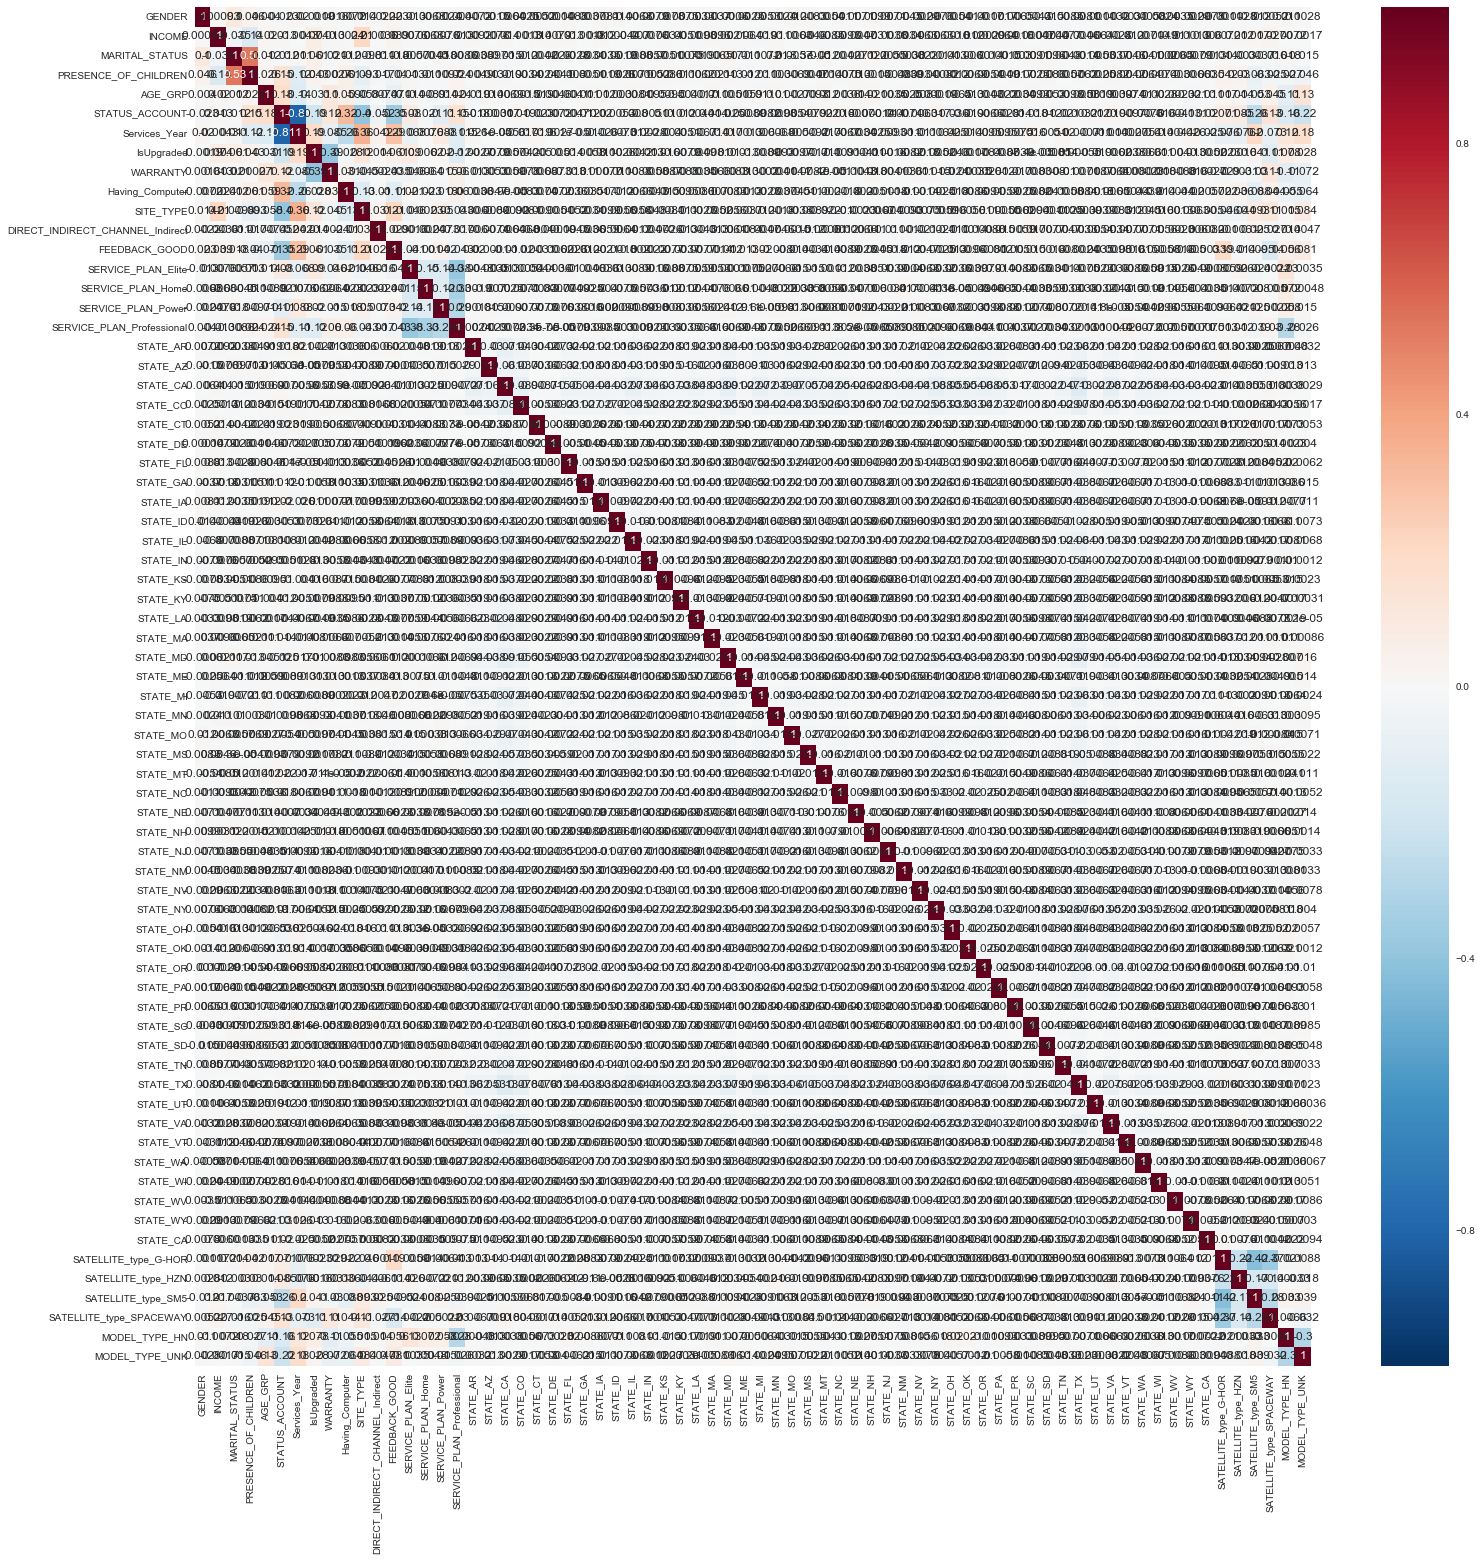

In [194]:
plt.figure(figsize=(25,25))
sns.heatmap(df17.corr(),annot=True)

In [195]:
cor1=df17.corr()
cor2=cor1[cor1 != 1][abs(cor1) > 0.5].dropna(how='all', axis=1).dropna(how='all', axis=0)
cor2

,MARITAL_STATUS,PRESENCE_OF_CHILDREN,STATUS_ACCOUNT,Services_Year
MARITAL_STATUS,NaN,0.531641,NaN,NaN
PRESENCE_OF_CHILDREN,0.531641,NaN,NaN,NaN
STATUS_ACCOUNT,NaN,NaN,NaN,-0.810545
Services_Year,NaN,NaN,-0.810545,NaN


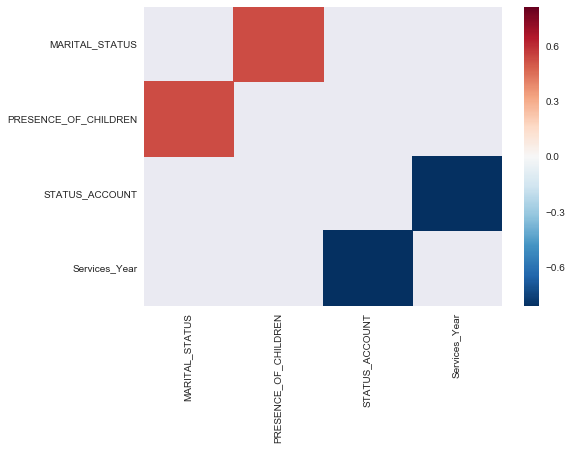

In [196]:
sns.heatmap(cor2)

###### 4.3 chi Square Test
finding multi co-lineraity b/w two categorical variable

In [197]:
import scipy.stats as stats

In [198]:
var_int

Index([              u'GENDER',               u'INCOME',
             u'MARITAL_STATUS', u'PRESENCE_OF_CHILDREN',
                    u'AGE_GRP',       u'STATUS_ACCOUNT',
              u'Services_Year',           u'IsUpgraded',
                   u'WARRANTY',      u'Having_Computer',
                  u'SITE_TYPE'],
      dtype='object')

In [199]:
var_int_1=df17[var_int].columns.difference(["Services_Year","STATUS_ACCOUNT"])

In [200]:
ch_square_df=pd.DataFrame()
for i in var_int_1:
    temp=pd.crosstab(df17[i], df17.STATUS_ACCOUNT, margins=True)
    chi_stats=stats.chi2_contingency(observed=temp)
    chi_summary=pd.DataFrame([i, chi_stats[0], chi_stats[1]]).T
    chi_summary.columns=["Var_Name","T-Stastictics","P-Stastistics"]
    ch_square_df=pd.concat([ch_square_df,chi_summary], axis=0, ignore_index=True)
    
ch_square_df    
    

,Var_Name,T-Stastictics,P-Stastistics
0,AGE_GRP,695.863,4.85393e-143
1,GENDER,9.09013,0.0588856
2,Having_Computer,1816.64,0
3,INCOME,1056.47,1.59635e-204
4,IsUpgraded,632.337,1.55278e-135
5,MARITAL_STATUS,2.81436,0.831759
6,PRESENCE_OF_CHILDREN,384.853,5.20782e-82
7,SITE_TYPE,2730.08,0
8,WARRANTY,2360.78,0


### 5 Predective Modeling/Analysis

In [201]:
#### importing necessary libraris

from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics

C:\Users\a505829\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###### 5.1 Split data into Train and test  (70-30)

In [202]:
feature_columns = df17.columns.difference(["STATUS_ACCOUNT"])

train_x, test_x, train_y, test_y=train_test_split(df17[feature_columns], df17["STATUS_ACCOUNT"], random_state=123, test_size=.3)

In [203]:
df17[feature_columns].head()

,AGE_GRP,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_GOOD,GENDER,Having_Computer,INCOME,IsUpgraded,MARITAL_STATUS,MODEL_TYPE_HN,MODEL_TYPE_UNK,...,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,Services_Year,WARRANTY
0,2,1,0,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,10,3
2,4,1,0,2,1,8,1,1,0,0,...,0,0,0,0,0,0,0,0,10,3
3,4,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,10,3
4,4,1,1,1,0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,10,3
5,5,1,0,1,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,10,3


In [204]:
print "Total train size: x : ", train_x.shape, "and Train size Y: ", train_y.shape
print "Total test size: x : ", test_x.shape, "and Test size Y: ", test_y.shape

Total train size: x :  (12243, 69) and Train size Y:  (12243L,)
Total test size: x :  (5247, 69) and Test size Y:  (5247L,)


###### 5.2 Logistic Regression

('Accuract Score for Logistic Regression : ', 0.93348580141032966)
True positive :  2390
True Negative :  2508
False Positive :  117
False Negative :  232
Sensitivity : True postive Rate 0.91
Specificity : True Negative Rate 0.96
Positive Predected Values 0.95
Negative Predective values 0.92

 Overall Accuracy 0.93


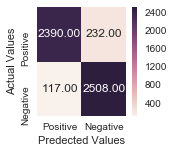

In [205]:
model=LogisticRegression()
model.fit(train_x, train_y)
pred_y=model.predict(test_x)
print ("Accuract Score for Logistic Regression : ", metrics.accuracy_score(test_y, pred_y))
cm=metrics.confusion_matrix(test_y, pred_y,[1,0])

TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]

print "True positive : ", TP
print "True Negative : ", TN
print "False Positive : ", FP
print "False Negative : ", FN

TPR = float(TP)/(TP+FN)
TNR = float(TN)/(TN+FP)
PPV = float(TP)/(TP+FP)
NPV = float(TN)/(TN+FN)
OA = float(TP+TN)/(TP+TN+FP+FN)

print "Sensitivity : True postive Rate", round(TPR,2)
print "Specificity : True Negative Rate", round(TNR,2)
print "Positive Predected Values", round(PPV,2)
print "Negative Predective values", round (NPV,2)
print "\n Overall Accuracy", round(OA,2)

plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=["Positive","Negative"], yticklabels=["Positive","Negative"])

plt.xlabel("Predected Values")
plt.ylabel("Actual Values")




In [206]:
float(TP)/(TP+FN)

0.9115179252479023

###### 5.3 SVM (Radial and Linear)

Accuracy for  rbf SVM 0.941490375453
False positive 74
False Negative 233
True positive 2389
True Negative 2551
Accuracy for  linear SVM 0.934629311988
False positive 112
False Negative 231
True positive 2391
True Negative 2513


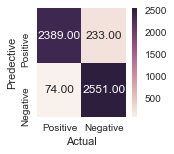

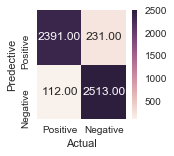

In [207]:
types=["rbf",'linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_x, train_y)
    pred_y=model.predict(test_x)
    print "Accuracy for ", i , "SVM", metrics.accuracy_score(test_y, pred_y)
    cm=metrics.confusion_matrix(test_y, pred_y,[1,0])
    #f,ax=plt.subplots(1,2, figsize=(15,5))
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, xticklabels=["Positive","Negative"], yticklabels=["Positive","Negative"],fmt=".2f")
    print "False positive", cm[1][0]
    print "False Negative", cm[0][1]
    print "True positive", cm[0][0]
    print "True Negative", cm[1][1]
    
    plt.xlabel("Actual")
    plt.ylabel("Predective")

###### 5.5 Preceptron modelling

In [208]:
model=Perceptron(random_state=1)
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print "Accuracy score using preceptron modeling: ", metrics.accuracy_score(test_y, pred_y)


Accuracy score using preceptron modeling:  0.920907185058


###### 5.6 Decision Tree

In [209]:
model=DecisionTreeClassifier(random_state=1)
model.fit(train_x, train_y)
print "Accuracy with Decision Tree : ", metrics.accuracy_score(test_y, model.predict(test_x))

Accuracy with Decision Tree :  0.933676386507


###### 5.7 K-NN (Nearest neighbours) Classifiers

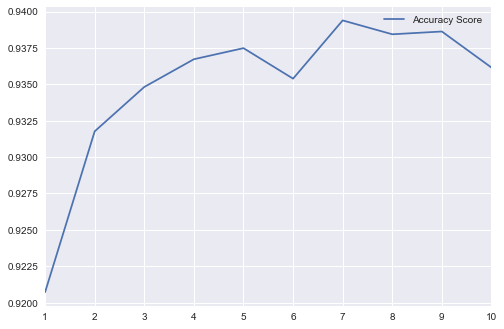

In [210]:

b=[]
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    b.append(metrics.accuracy_score(test_y, model.predict(test_x)))
b=pd.DataFrame(b,index=range(1,11))
b.columns=["Accuracy Score"]
b.plot()  
    

Max accuracy reached at k=7, around 94%

###### In nut shell

In [211]:
models=[LogisticRegression(), svm.SVC(kernel='rbf'), svm.SVC(kernel='linear'),Perceptron(random_state=123),
        DecisionTreeClassifier(random_state=123),KNeighborsClassifier(n_neighbors=7)]
Acc_Metrices=[]
Classifier=["LogisticRegression","Radial_SVM","Linear_SVM","Perceptron","DecisionTreeClassifier","KNN_7"]

for i in models:
    i.fit(train_x,train_y)
    Acc_Metrices.append(metrics.accuracy_score(test_y, i.predict(test_x)))
Acc_Metrices=pd.DataFrame(Acc_Metrices,index=Classifier)
Acc_Metrices.columns=["Accuract Score"]
Acc_Metrices
    

,Accuract Score
LogisticRegression,0.933486
Radial_SVM,0.941490
Linear_SVM,0.934629
Perceptron,0.851153
DecisionTreeClassifier,0.935963
KNN_7,0.939394


The above algorithms are not giving vey high accuracy. This can be improved by using Feature Selection and using only relevant features. We can also use ensembling or averaging of different algorithms. 

###### 5.8 K Fold -Cross Validation

In [212]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [213]:
kfold=KFold(n_splits=20, random_state=123)
Accuracy=[]
XYZ=[]
ABC=[]
STD=[]

models=[LogisticRegression(), svm.SVC(kernel='rbf'), svm.SVC(kernel='linear'),Perceptron(random_state=123),
        DecisionTreeClassifier(random_state=123),KNeighborsClassifier(n_neighbors=7)]
Acc_Metrices=[]
Classifier=["LogisticRegression","Radial_SVM","Linear_SVM","Perceptron","DecisionTreeClassifier","KNN_7"]

for i in models:
    CvScore=cross_val_score(i,train_x, train_y,cv=kfold,scoring='accuracy')
    XYZ.append(CvScore.mean())
    STD.append(CvScore.std())
    Acc_Metrices.append(CvScore)
new_Model=pd.DataFrame({"Mean" : XYZ, "STD" : STD}, index=Classifier)
new_Model

,Mean,STD
LogisticRegression,0.935881,0.006949
Radial_SVM,0.943805,0.007819
Linear_SVM,0.936453,0.006638
Perceptron,0.921021,0.013270
DecisionTreeClassifier,0.935799,0.011077
KNN_7,0.940538,0.007651


In [214]:
pd.DataFrame(Acc_Metrices)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.924959,0.936378,0.952692,0.934641,0.941176,0.942810,0.931373,0.937908,0.931373,0.937908,0.941176,0.933007,0.931373,0.944444,0.933007,0.923203,0.942810,0.926471,0.934641,0.936275
1,0.923328,0.951060,0.955954,0.944444,0.947712,0.942810,0.928105,0.942810,0.950980,0.952614,0.946078,0.941176,0.946078,0.952614,0.937908,0.936275,0.944444,0.941176,0.942810,0.947712
2,0.926591,0.939641,0.952692,0.929739,0.942810,0.939542,0.928105,0.933007,0.939542,0.941176,0.934641,0.933007,0.936275,0.947712,0.934641,0.926471,0.937908,0.929739,0.936275,0.939542
3,0.908646,0.885808,0.910277,0.934641,0.933007,0.924837,0.928105,0.934641,0.928105,0.942810,0.931373,0.915033,0.924837,0.924837,0.915033,0.905229,0.934641,0.913399,0.906863,0.918301
4,0.946166,0.929853,0.949429,0.926471,0.947712,0.931373,0.915033,0.934641,0.913399,0.950980,0.944444,0.946078,0.928105,0.928105,0.941176,0.926471,0.941176,0.929739,0.950980,0.934641
5,0.929853,0.941272,0.949429,0.929739,0.944444,0.934641,0.924837,0.946078,0.952614,0.944444,0.936275,0.949346,0.941176,0.947712,0.942810,0.936275,0.947712,0.931373,0.934641,0.946078


###### 5.9 Random forest classifier

In [215]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=40,random_state=123)
model.fit(train_x, train_y)
print "Accuracy for random forest: ", metrics.accuracy_score(test_y, model.predict(test_x))

Accuracy for random forest:  0.957308938441


In [216]:
pd.Series(model.feature_importances_, index=train_x.columns).sort_values(ascending=False).to_frame()

,0
Services_Year,0.413473
SITE_TYPE,0.086647
FEEDBACK_GOOD,0.070131
INCOME,0.048622
WARRANTY,0.048322
Having_Computer,0.041920
AGE_GRP,0.031134
SATELLITE_type_SM5,0.022744
SATELLITE_type_SPACEWAY,0.022221
MODEL_TYPE_HN,0.019538


###### 5.10 Recursive feature elimination (RFE) with random forest

it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

In [217]:
from sklearn.feature_selection import RFE

rfe_40=RandomForestClassifier()
ref=RFE(estimator=rfe_40, n_features_to_select=20, step=1)

ref= ref.fit(train_x,train_y)

In [218]:
new_x=df17[train_x.columns[ref.support_]]
new_y=df17.STATUS_ACCOUNT

print new_x.shape, new_y.shape
X_train, X_test, y_train, y_test =train_test_split(new_x, new_y,test_size=.3,random_state=42)

(17490, 20) (17490L,)


In [219]:
r=RandomForestClassifier(n_estimators=200) 
r.fit(X_train,y_train)

pred=r.predict(X_test)
metrics.accuracy_score(y_test,pred)

0.96112064036592337

In [220]:
print('Chosen best 30 feature by rfe:',train_x.columns[ref.support_])
print ("Random forest with RFE :", metrics.accuracy_score(y_test,pred))

('Chosen best 30 feature by rfe:', Index([                         u'AGE_GRP',
       u'DIRECT_INDIRECT_CHANNEL_Indirect',
                          u'FEEDBACK_GOOD',
                                 u'GENDER',
                        u'Having_Computer',
                                 u'INCOME',
                             u'IsUpgraded',
                         u'MARITAL_STATUS',
                          u'MODEL_TYPE_HN',
                         u'MODEL_TYPE_UNK',
                   u'PRESENCE_OF_CHILDREN',
                   u'SATELLITE_type_G-HOR',
                     u'SATELLITE_type_SM5',
                u'SATELLITE_type_SPACEWAY',
                     u'SERVICE_PLAN_Elite',
              u'SERVICE_PLAN_Professional',
                              u'SITE_TYPE',
                               u'STATE_TX',
                          u'Services_Year',
                               u'WARRANTY'],
      dtype='object'))
('Random forest with RFE :', 0.96112064036592337)


###### 5.11 Recursive feature elimination with cross validation and random forest classification

Now we will not only find best features but we also find how many features do we need for best accuracy.

In [221]:
from sklearn.feature_selection import RFECV

rf_4=RandomForestClassifier()
rfecv=RFECV(estimator=rf_4, step=1, cv=5, scoring='accuracy')
rfecv.fit(train_x, train_y)

RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [222]:
print ("Optimal no of Features : ",rfecv.n_features_)
print "Best Feature :", train_x.columns[rfecv.support_]

('Optimal no of Features : ', 41)
Best Feature : Index([                         u'AGE_GRP',
       u'DIRECT_INDIRECT_CHANNEL_Indirect',
                          u'FEEDBACK_GOOD',
                                 u'GENDER',
                        u'Having_Computer',
                                 u'INCOME',
                             u'IsUpgraded',
                         u'MARITAL_STATUS',
                          u'MODEL_TYPE_HN',
                         u'MODEL_TYPE_UNK',
                   u'PRESENCE_OF_CHILDREN',
                   u'SATELLITE_type_G-HOR',
                     u'SATELLITE_type_HZN',
                     u'SATELLITE_type_SM5',
                u'SATELLITE_type_SPACEWAY',
                     u'SERVICE_PLAN_Elite',
                      u'SERVICE_PLAN_Home',
                     u'SERVICE_PLAN_Power',
              u'SERVICE_PLAN_Professional',
                              u'SITE_TYPE',
                               u'STATE_AR',
                           

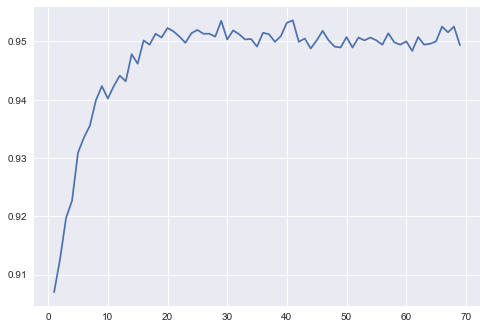

In [223]:
### Plot b/w Features v/s cross validattion

plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make feature selection and understanding data. Then last make our last feature selection method.

###### Tree based feature selection and random forest classification

In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

In [224]:
rf_5=RandomForestClassifier()
rf_5.fit(train_x,train_y)
importances= rf_5.feature_importances_

std=np.std([tree.feature_importances_ for tree in rf_5.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


In [225]:
print "Feature Ranking : "
for f in range(train_x.shape[1]):
    print "%d feature %d (%f)" %(f+1, indices[f], importances[indices[f]])

Feature Ranking : 
1 feature 67 (0.494659)
2 feature 4 (0.060991)
3 feature 2 (0.054419)
4 feature 19 (0.052068)
5 feature 5 (0.037938)
6 feature 68 (0.030534)
7 feature 0 (0.027686)
8 feature 8 (0.021629)
9 feature 11 (0.020859)
10 feature 9 (0.017210)
11 feature 6 (0.014972)
12 feature 13 (0.014358)
13 feature 18 (0.013668)
14 feature 14 (0.011889)
15 feature 7 (0.010784)
16 feature 10 (0.010501)
17 feature 3 (0.008468)
18 feature 15 (0.007664)
19 feature 1 (0.006715)
20 feature 22 (0.006016)
21 feature 12 (0.005777)
22 feature 59 (0.004459)
23 feature 17 (0.004255)
24 feature 16 (0.003783)
25 feature 24 (0.003380)
26 feature 61 (0.003209)
27 feature 50 (0.003108)
28 feature 37 (0.002479)
29 feature 31 (0.002468)
30 feature 41 (0.002366)
31 feature 39 (0.002333)
32 feature 53 (0.002327)
33 feature 20 (0.001763)
34 feature 52 (0.001669)
35 feature 44 (0.001593)
36 feature 64 (0.001569)
37 feature 34 (0.001566)
38 feature 21 (0.001557)
39 feature 54 (0.001479)
40 feature 35 (0.001415)


(-1, 69)

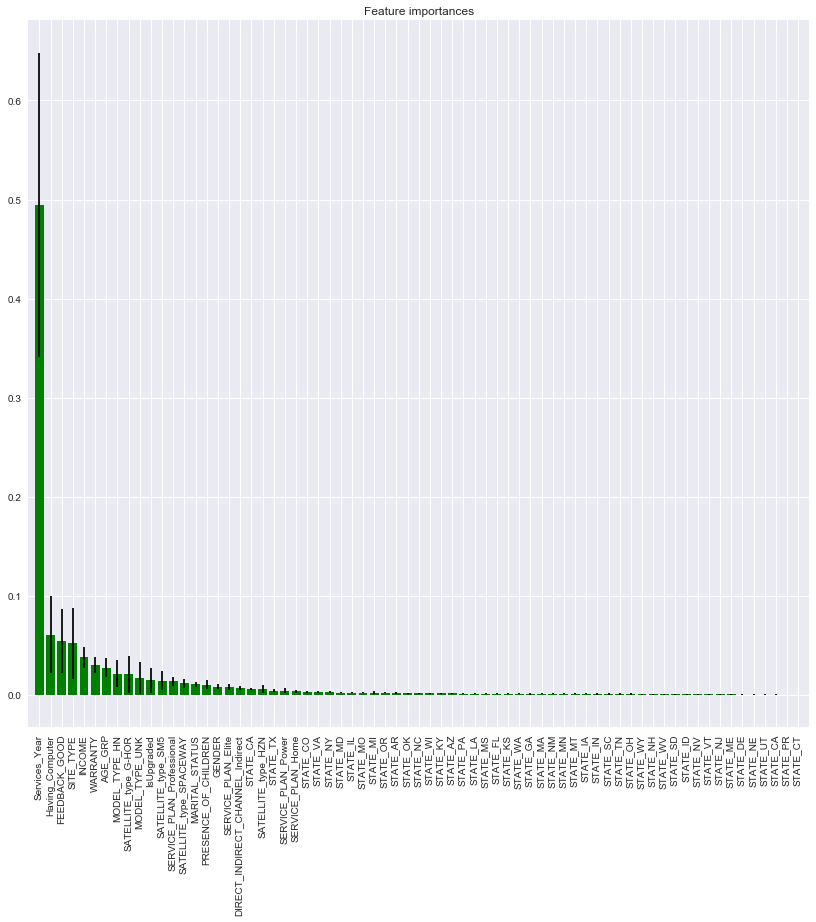

In [226]:
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(test_x.shape[1]), train_x.columns[indices],rotation=90)
plt.xlim([-1, train_x.shape[1]])

As you can seen in plot above, after 16 best features importance of features decrease. Therefore we can focus these 16 features. As I sad before, I give importance to understand features and find best of them.

###### Feature Extraction

We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

In [227]:
#train_x_N = (train_x-train_x.mean())/(train_x.max()-train_x.min())
#test_x_N  = (test_x-test_x.mean())/(test_x.max()-test_x.min())